<div class="alert alert-block alert-success">
     
# IC PCDA CAPSTONE - HARRY BAKHSHI - NOTEBOOK 2 - EXPLORATORY DATA ANALYSIS
     
</div>

MIT License for code used from https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python in notebook:   
https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python?tab=MIT-1-ov-file     

(Accessed 06/06/2024)

In [1]:
import pickle
import time
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import sys
import statistics
pio.templates.default = "plotly_white"

In [2]:
#!pip install kaleido 
#!pip install matrixprofile-ts

Load multivariate timeseries:

In [3]:
#multivariate timeseries:
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/janatahack_demand_forecasting_data_eda_ts.pik'
# with open(file, 'wb') as f:
#     pickle.dump(eda_ts_df, f) #write df to .pik file on disk
with open(file, 'rb') as f:
     eda_ts_df = pickle.load(f) #load pickle file 'file' into variable
ts_df = eda_ts_df

Have a look at the data again:

In [4]:
ts_df.head()

timestamp  median_total_price  median_base_price  median_units_sold  \
0 2011-01-08            205.9125           205.9125               28.0   
1 2011-01-17            190.2375           205.9125               38.0   
2 2011-01-24            190.2375           205.9125               37.0   
3 2011-01-31            210.1875           210.9000               33.0   
4 2011-02-05            210.9000           211.6125               31.0   

   percent_featured  percent_display  
0          0.066667         0.077922  
1          0.189610         0.163636  
2          0.274459         0.195671  
3          0.010390         0.096104  
4          0.000000         0.089177

Create new df allowing filtering of the data by time characteristics:

In [5]:
ts_df = ts_df.set_index("timestamp")
ts_df["weekday_name"] = ts_df.index.day_name()
ts_df["weekday"] = ts_df.index.weekday
ts_df["week"] = ts_df.index.isocalendar().week
ts_df["day"] = ts_df.index.day
ts_df["date"] = ts_df.index.date
ts_df["month"] = ts_df.index.month
ts_df["month_name"] = ts_df.index.month_name()
ts_df["year"] = ts_df.index.year
ts_df["week_of_month"] = pd.Series(np.zeros(len(ts_df)), index=ts_df.index)
from math import ceil
def get_week_of_month(date):
   first_day = date.replace(day=1)

   day_of_month = date.day

   if(first_day.weekday() == 6):
       adjusted_dom = (1 + first_day.weekday()) / 7
   else:
       adjusted_dom = day_of_month + first_day.weekday()

   return int(ceil(adjusted_dom/7.0))
#^https://stackoverflow.com/questions/3806473/week-number-of-the-month/26662038#26662038
#Accessed 10/06/2024
for row in range(len(ts_df)):
    ts_df["week_of_month"][row] = get_week_of_month(eda_ts_df['timestamp'][row])
#Making ordered categoricals to make for sorted plots
ts_df['month_name'] = pd.Categorical(ts_df['month_name'], categories=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ordered=True)
ts_df['weekday_name'] = pd.Categorical(ts_df['weekday_name'], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

/tmp/ipykernel_66107/1927282037.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df["week_of_month"][row] = get_week_of_month(eda_ts_df['timestamp'][row])
/tmp/ipykernel_66107/1927282037.py:26: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ts_df["week_of_month"][row] = get_week_of_month(eda_ts_df['timestamp'][row])


See it to check:

In [6]:
ts_df.head()

median_total_price  median_base_price  median_units_sold  \
timestamp                                                              
2011-01-08            205.9125           205.9125               28.0   
2011-01-17            190.2375           205.9125               38.0   
2011-01-24            190.2375           205.9125               37.0   
2011-01-31            210.1875           210.9000               33.0   
2011-02-05            210.9000           211.6125               31.0   

            percent_featured  percent_display weekday_name  weekday  week  \
timestamp                                                                   
2011-01-08          0.066667         0.077922     Saturday        5     1   
2011-01-17          0.189610         0.163636       Monday        0     3   
2011-01-24          0.274459         0.195671       Monday        0     4   
2011-01-31          0.010390         0.096104       Monday        0     5   
2011-02-05          0.000000         0.089177     Saturday        5     5   

            day        date  month month_name  year  week_of_month  
timestamp                                                           
2011-01-08    8  2011-01-08      1    January  2011            2.0  
2011-01-17   17  2011-01-17      1    January  2011            4.0  
2011-01-24   24  2011-01-24      1    January  2011            5.0  
2011-01-31   31  2011-01-31      1    January  2011            6.0  
2011-02-05    5  2011-02-05      2   February  2011            1.0

In [7]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130 entries, 2011-01-08 to 2013-12-03
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   median_total_price  130 non-null    float64 
 1   median_base_price   130 non-null    float64 
 2   median_units_sold   130 non-null    float64 
 3   percent_featured    130 non-null    float64 
 4   percent_display     130 non-null    float64 
 5   weekday_name        130 non-null    category
 6   weekday             130 non-null    int32   
 7   week                130 non-null    UInt32  
 8   day                 130 non-null    int32   
 9   date                130 non-null    object  
 10  month               130 non-null    int32   
 11  month_name          130 non-null    category
 12  year                130 non-null    int32   
 13  week_of_month       130 non-null    float64 
dtypes: UInt32(1), category(2), float64(6), int32(4), object(1)
memory usage

Create function for formatting plotly plots:

In [8]:
#For formatting plots:
def format_plot(fig, legends = None, xlabel="Time", ylabel="Value", figsize=(500,900), font_size=15, title_font_size=20):
    if legends:
        names = cycle(legends)
        fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_layout(
            autosize=False,
            width=figsize[1],
            height=figsize[0],
            title={
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
            titlefont={
                "size": 20
            },
            legend_title = None,
            legend=dict(
                font=dict(size=font_size),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                title_text=ylabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            xaxis=dict(
                title_text=xlabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            )
        )
    return fig

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Can use inspect.signature() to see how a function (inbuilt or otherwise) can be tweaked by parameters:

In [9]:
# import required modules  
import inspect  
  
# use getargspec()  
print(inspect.signature(px.line))
#^https://www.geeksforgeeks.org/how-to-get-list-of-parameters-name-from-a-function-in-python/
#Accessed 05/06/2024

(data_frame=None, x=None, y=None, line_group=None, color=None, line_dash=None, symbol=None, hover_name=None, hover_data=None, custom_data=None, text=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, orientation=None, color_discrete_sequence=None, color_discrete_map=None, line_dash_sequence=None, line_dash_map=None, symbol_sequence=None, symbol_map=None, markers=False, log_x=False, log_y=False, range_x=None, range_y=None, line_shape=None, render_mode='auto', title=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure


# EDA STEP 1: Univariate Line Charts for all variables against time

In [10]:
round((32/(900))*130) #size of sub-sequences to compare for conserved features in time - github example used 32 for sequence of 
#approx. length 900 = 32/900

5

Line chart - sales prices

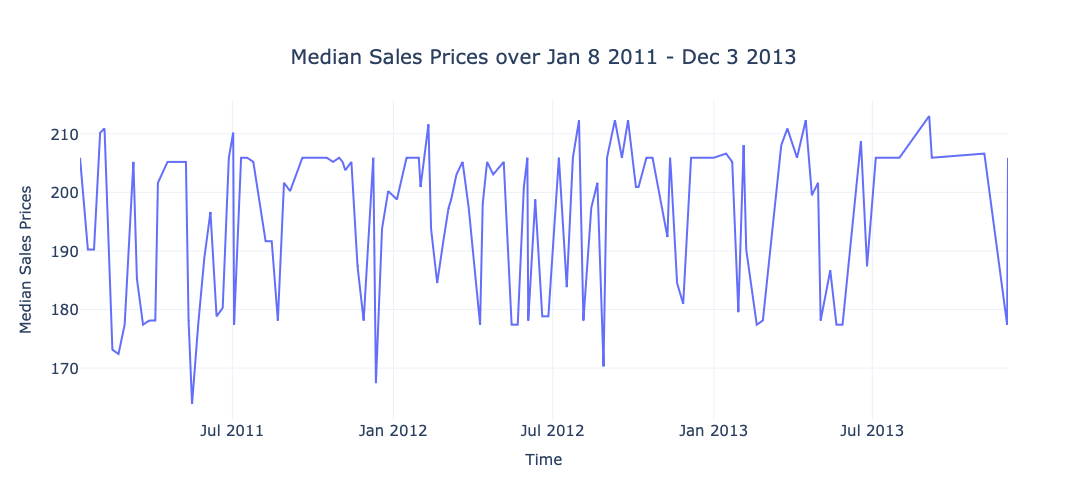

[64]

In [16]:
#Line chart - median sales price

# timestamp:
# ts_df.index = date of record (day in a given week when record made) (numeric, time series) 

# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#Check path:
#for p in sys.path: print(p)
#Add src to path:
# sys.path.insert(0, '/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src')
#for p in sys.path: print(p)

fig = px.line(ts_df, y="median_total_price", title="Median Sales Prices over Jan 8 2011 - Dec 3 2013")
fig = format_plot(fig, ylabel="Median Sales Prices")
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_median_total_price_line_plot.png")
fig.show()

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

#Calculate seasonal period:
seasonal_period_list = []
from matrixprofile import *
pattern = ts_df.median_total_price
pattern = pattern.to_numpy()
m = 5 #size of sub-sequences to compare for conserved features; 
mp = matrixProfile.stomp(pattern, m)
for ele in range(len(list(mp[1]))):
    if mp[1][ele] == float('inf'):
        #https://www.geeksforgeeks.org/python-infinity/https://codedamn.com/news/python/how-to-represent-infinity-in-python#
        #Accessed 14/06/2024
        mp[1][ele] = 0
mtfs , motif_d  = motifs.motifs(pattern, mp, max_motifs=10)
#mtfs = list of lists where each list is a motif with the indices of where each instance of the motif begins
#motif_d = how conserved each motif is
for ele in range(len(mtfs)):
    if len(mtfs[ele]) >= 3: #need two complete cycles for imputation = 3 indices of conserved features from the repeating motif
        motif = motif_d.index(min(motif_d[:(ele + 1)])) #best motif_d = most conserved
        dist_list = []
        for instance in range(len(mtfs[motif]) - 1):
            inst_current = mtfs[motif][instance]
            inst_next = mtfs[motif][instance + 1]
            dist_timestamps = inst_next - inst_current
            dist_list.append(dist_timestamps)
        seasonal_per = statistics.median(dist_list) #(typical value as a measure of central tendency for a skewed or symmeteric 
        #(median = mean (1)) distribution):    
        #^(1) - https://online.stat.psu.edu/stat200/lesson/2/2.2/2.2.4/2.2.4.1
        seasonal_period_list.append(seasonal_per)
    else:
        seasonal_period_list.append('not seasonal')
#^https://stackoverflow.com/questions/49873443/repeated-patterns-in-time-series-graphs - learned of Matrix Profile method
#Accessed 14/06/2024
#^http://www.cs.ucr.edu/~eamonn/Matrix_Profile_Tutorial_Part1.pdf - understood principles of Matrix Profile method
#Accessed 14/06/2024
#^http://www.cs.ucr.edu/~eamonn/MatrixProfile.html - found link to python package implementing Matrix Profile method, matrixprofile-ts
#Accessed 14/06/2024
#^https://github.com/target/matrixprofile-ts/blob/master/docs/examples/Motif%20Discovery.ipynb , https://github.com/target/matrixprofile-ts/blob/master/matrixprofile/matrixProfile.py
#Found source code and adapted it for calculating seasonal period from identified motifs
#Accessed 14/06/2024
#Find unique seasons:
entry_list = seasonal_period_list
found_list = []
unique_list = []
entry = []
entry_list_length = len(seasonal_period_list)
for i in range(entry_list_length):
    entry = entry_list[i]
    if entry not in found_list:
        unique_list.append(entry)
        found_list.append(entry)
unique_list
loopcount = len(unique_list)
i = 0
while i < loopcount:
    #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
    #Accessed 03/06/2024
    var = unique_list[i]
    if isinstance(var, str) == True:
        #^https://pythonprinciples.com/blog/check-if-var-is-string/
        #Accessed 14/06/2024
        unique_list.remove(unique_list[i])
        loopcount = int(loopcount - 1)
        #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
        #Accessed 03/06/2024
    i += 1
    #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
    #Accessed 03/06/2024  
if not unique_list:
    seasonal_per = 'not seasonal'
#^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
#Accessed 14/06/2024
else:
    for item in range(len(unique_list)):
        if unique_list[item] > (len(ts_df)/2): #need min observations for 2 cycles of the season to be valid
            del unique_list[item]
            #^https://note.nkmk.me/en/python-list-clear-pop-remove-del/#remove-items-by-index-or-slice-del
            #Accessed 23/06/2024
    if not unique_list:
        seasonal_per = 'not seasonal'
        #^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
        #Accessed 14/06/2024
    else:
        seasonal_per = unique_list #without domain knowledge; interpolator function as defined from source code can only take a single integer seasonal period argument, see below
#- https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/495cd6275ca3f3fd9951348d63fc0020a0f43636/src/imputation/interpolation.py
seasonal_per

Observations: 1 season every 64 weeks

Line chart - base prices 

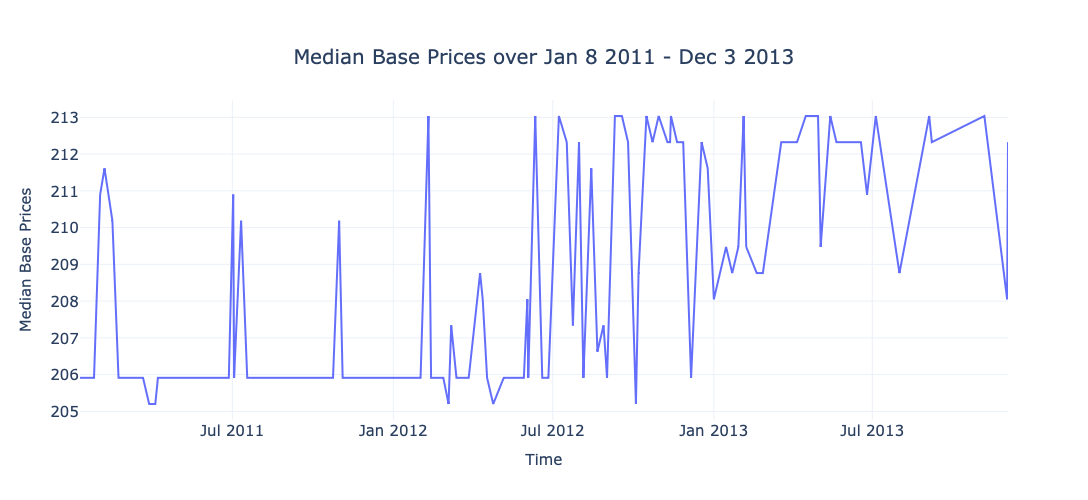

/opt/anaconda3/lib/python3.11/site-packages/matrixprofile/utils.py:68: RuntimeWarning:

invalid value encountered in sqrt

/opt/anaconda3/lib/python3.11/site-packages/matrixprofile/utils.py:177: RuntimeWarning:

divide by zero encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/matrixprofile/utils.py:177: RuntimeWarning:

invalid value encountered in divide



'not seasonal'

In [17]:
#Line chart - median base price

# timestamp:
# ts_df.index = date of record (day in a given week when record made) (numeric, time series) 

# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#Check path:
#for p in sys.path: print(p)
#Add src to path:
# sys.path.insert(0, '/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src')
#for p in sys.path: print(p)

fig = px.line(ts_df, y='median_base_price', title="Median Base Prices over Jan 8 2011 - Dec 3 2013")
fig = format_plot(fig, ylabel="Median Base Prices")
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_median_base_price_line_plot.png")
fig.show()

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

#Calculate seasonal period:
seasonal_period_list = []
from matrixprofile import *
pattern = ts_df.median_base_price
pattern = pattern.to_numpy()
m = 5 #size of sub-sequences to compare for conserved features
mp = matrixProfile.stomp(pattern, m)
for ele in range(len(list(mp[1]))):
    if mp[1][ele] == float('inf'):
        #https://www.geeksforgeeks.org/python-infinity/https://codedamn.com/news/python/how-to-represent-infinity-in-python#
        #Accessed 14/06/2024
        mp[1][ele] = 0
mtfs , motif_d  = motifs.motifs(pattern, mp, max_motifs=10)
#mtfs = list of lists where each list is a motif with the indices of where each instance of the motif begins
#motif_d = how conserved each motif is
for ele in range(len(mtfs)):
    if len(mtfs[ele]) >= 3: #need two complete cycles for imputation = 3 indices of conserved features from the repeating motif
        motif = motif_d.index(min(motif_d[:(ele + 1)])) #best motif_d = most conserved
        dist_list = []
        for instance in range(len(mtfs[motif]) - 1):
            inst_current = mtfs[motif][instance]
            inst_next = mtfs[motif][instance + 1]
            dist_timestamps = inst_next - inst_current
            dist_list.append(dist_timestamps)
        seasonal_per = statistics.median(dist_list) #(typical value as a measure of central tendency for a skewed or symmeteric 
        #(median = mean (1)) distribution):    
        #^(1) - https://online.stat.psu.edu/stat200/lesson/2/2.2/2.2.4/2.2.4.1
        seasonal_period_list.append(seasonal_per)
    else:
        seasonal_period_list.append('not seasonal')
#^https://stackoverflow.com/questions/49873443/repeated-patterns-in-time-series-graphs - learned of Matrix Profile method
#Accessed 14/06/2024
#^http://www.cs.ucr.edu/~eamonn/Matrix_Profile_Tutorial_Part1.pdf - understood principles of Matrix Profile method
#Accessed 14/06/2024
#^http://www.cs.ucr.edu/~eamonn/MatrixProfile.html - found link to python package implementing Matrix Profile method, matrixprofile-ts
#Accessed 14/06/2024
#^https://github.com/target/matrixprofile-ts/blob/master/docs/examples/Motif%20Discovery.ipynb , https://github.com/target/matrixprofile-ts/blob/master/matrixprofile/matrixProfile.py
#Found source code and adapted it for calculating seasonal period from identified motifs
#Accessed 14/06/2024
#Find unique seasons:
entry_list = seasonal_period_list
found_list = []
unique_list = []
entry = []
entry_list_length = len(seasonal_period_list)
for i in range(entry_list_length):
    entry = entry_list[i]
    if entry not in found_list:
        unique_list.append(entry)
        found_list.append(entry)
unique_list
loopcount = len(unique_list)
i = 0
while i < loopcount:
    #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
    #Accessed 03/06/2024
    var = unique_list[i]
    if isinstance(var, str) == True:
        #^https://pythonprinciples.com/blog/check-if-var-is-string/
        #Accessed 14/06/2024
        unique_list.remove(unique_list[i])
        loopcount = int(loopcount - 1)
        #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
        #Accessed 03/06/2024
    i += 1
    #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
    #Accessed 03/06/2024  
if not unique_list:
    seasonal_per = 'not seasonal'
#^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
#Accessed 14/06/2024
else:
    for item in range(len(unique_list)):
        if unique_list[item] > (len(ts_df)/2): #need min observations for 2 cycles of the season to be valid
            del unique_list[item]
            #^https://note.nkmk.me/en/python-list-clear-pop-remove-del/#remove-items-by-index-or-slice-del
            #Accessed 23/06/2024
    if not unique_list:
        seasonal_per = 'not seasonal'
        #^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
        #Accessed 14/06/2024
    else:
        seasonal_per = unique_list #without domain knowledge; interpolator function as defined from source code can only take a single integer seasonal period argument, see below
#- https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/495cd6275ca3f3fd9951348d63fc0020a0f43636/src/imputation/interpolation.py
seasonal_per

Observations: not seasonal

Line chart - units sold

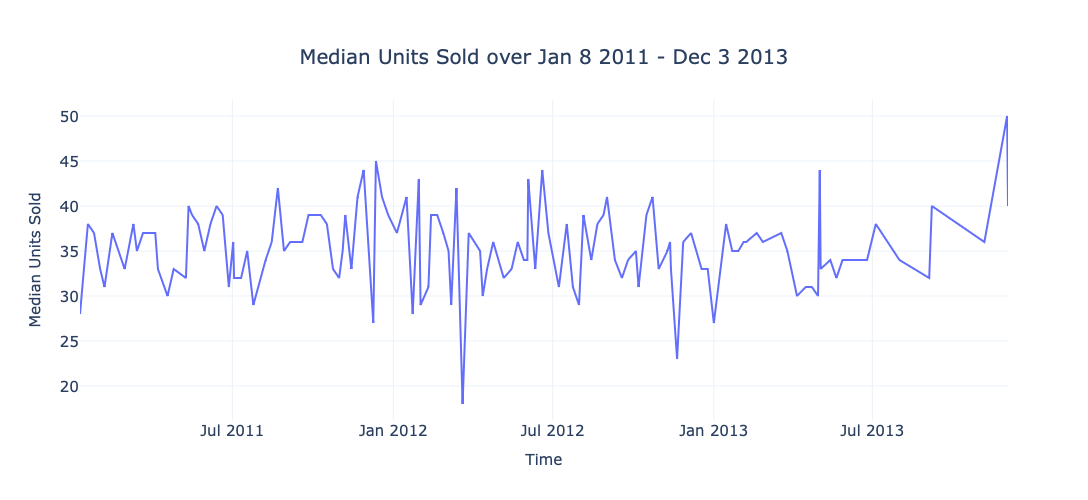

[35]

In [18]:
#Line chart - median units sold

#timestamp:
#ts_df.index = date of record (day in a given week when record made) (numeric, time series)

# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#Check path:
#for p in sys.path: print(p)
#Add src to path:
# sys.path.insert(0, '/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src')
#for p in sys.path: print(p)

fig = px.line(ts_df, y="median_units_sold", title="Median Units Sold over Jan 8 2011 - Dec 3 2013")
fig = format_plot(fig, ylabel="Median Units Sold")
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_median_units_sold_line_plot.png")
fig.show()

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

#Calculate seasonal period:
seasonal_period_list = []
from matrixprofile import *
pattern = ts_df.median_units_sold
pattern = pattern.to_numpy()
m = 5 #size of sub-sequences to compare for conserved features
mp = matrixProfile.stomp(pattern, m)
for ele in range(len(list(mp[1]))):
    if mp[1][ele] == float('inf'):
        #https://www.geeksforgeeks.org/python-infinity/https://codedamn.com/news/python/how-to-represent-infinity-in-python#
        #Accessed 14/06/2024
        mp[1][ele] = 0
mtfs , motif_d  = motifs.motifs(pattern, mp, max_motifs=10)
#mtfs = list of lists where each list is a motif with the indices of where each instance of the motif begins
#motif_d = how conserved each motif is
for ele in range(len(mtfs)):
    if len(mtfs[ele]) >= 3: #need two complete cycles for imputation = 3 indices of conserved features from the repeating motif
        motif = motif_d.index(min(motif_d[:(ele + 1)])) #best motif_d = most conserved
        dist_list = []
        for instance in range(len(mtfs[motif]) - 1):
            inst_current = mtfs[motif][instance]
            inst_next = mtfs[motif][instance + 1]
            dist_timestamps = inst_next - inst_current
            dist_list.append(dist_timestamps)
        seasonal_per = statistics.median(dist_list) #(typical value as a measure of central tendency for a skewed or symmeteric 
        #(median = mean (1)) distribution):    
        #^(1) - https://online.stat.psu.edu/stat200/lesson/2/2.2/2.2.4/2.2.4.1
        seasonal_period_list.append(seasonal_per)
    else:
        seasonal_period_list.append('not seasonal')
#^https://stackoverflow.com/questions/49873443/repeated-patterns-in-time-series-graphs - learned of Matrix Profile method
#Accessed 14/06/2024
#^http://www.cs.ucr.edu/~eamonn/Matrix_Profile_Tutorial_Part1.pdf - understood principles of Matrix Profile method
#Accessed 14/06/2024
#^http://www.cs.ucr.edu/~eamonn/MatrixProfile.html - found link to python package implementing Matrix Profile method, matrixprofile-ts
#Accessed 14/06/2024
#^https://github.com/target/matrixprofile-ts/blob/master/docs/examples/Motif%20Discovery.ipynb , https://github.com/target/matrixprofile-ts/blob/master/matrixprofile/matrixProfile.py
#Found source code and adapted it for calculating seasonal period from identified motifs
#Accessed 14/06/2024
#Find unique seasons:
entry_list = seasonal_period_list
found_list = []
unique_list = []
entry = []
entry_list_length = len(seasonal_period_list)
for i in range(entry_list_length):
    entry = entry_list[i]
    if entry not in found_list:
        unique_list.append(entry)
        found_list.append(entry)
unique_list
loopcount = len(unique_list)
i = 0
while i < loopcount:
    #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
    #Accessed 03/06/2024
    var = unique_list[i]
    if isinstance(var, str) == True:
        #^https://pythonprinciples.com/blog/check-if-var-is-string/
        #Accessed 14/06/2024
        unique_list.remove(unique_list[i])
        loopcount = int(loopcount - 1)
        #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
        #Accessed 03/06/2024
    i += 1
    #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
    #Accessed 03/06/2024  
if not unique_list:
    seasonal_per = 'not seasonal'
#^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
#Accessed 14/06/2024
else:
    for item in range(len(unique_list)):
        if unique_list[item] > (len(ts_df)/2): #need min observations for 2 cycles of the season to be valid
            del unique_list[item]
            #^https://note.nkmk.me/en/python-list-clear-pop-remove-del/#remove-items-by-index-or-slice-del
            #Accessed 23/06/2024
    if not unique_list:
        seasonal_per = 'not seasonal'
        #^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
        #Accessed 14/06/2024
    else:
        seasonal_per = unique_list #without domain knowledge; interpolator function as defined from source code can only take a single integer seasonal period argument, see below
#- https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/495cd6275ca3f3fd9951348d63fc0020a0f43636/src/imputation/interpolation.py
seasonal_per

Observations: season every 35 weeks

Line chart - percent featured

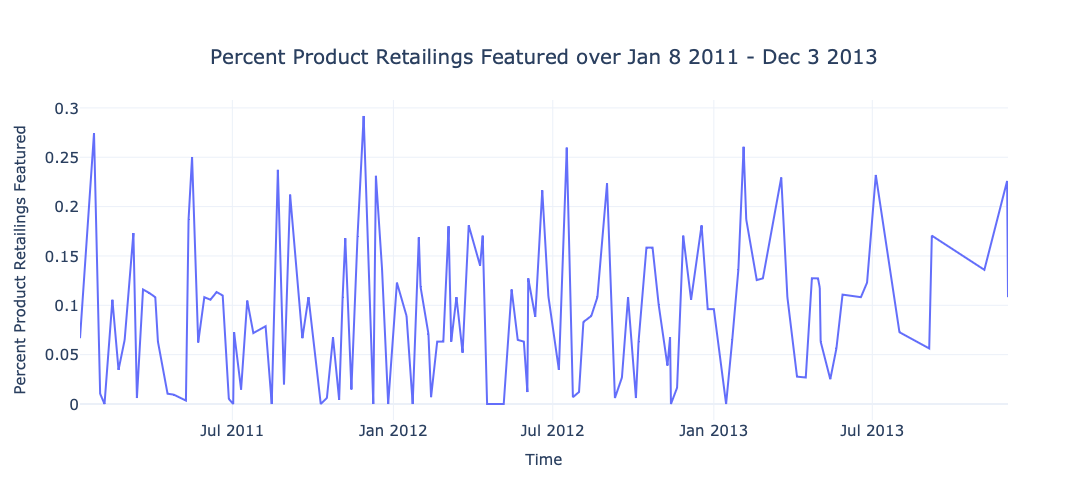

[13]

In [20]:
#Line chart - percent of retailings of products recorded where products were featured

#timestamp:
#ts_df.index = date of record (day in a given week when record made) (numeric, time series) 

# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#Check path:
#for p in sys.path: print(p)
#Add src to path:
# sys.path.insert(0, '/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src')
#for p in sys.path: print(p)

fig = px.line(ts_df, y="percent_featured", title="Percent Product Retailings Featured over Jan 8 2011 - Dec 3 2013")
fig = format_plot(fig, ylabel="Percent Product Retailings Featured")
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_percent_featured_line_plot.png")
fig.show()

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

#Calculate seasonal period:
seasonal_period_list = []
from matrixprofile import *
pattern = ts_df.percent_featured
pattern = pattern.to_numpy()
m = 5 #size of sub-sequences to compare for conserved features
mp = matrixProfile.stomp(pattern, m)
for ele in range(len(list(mp[1]))):
    if mp[1][ele] == float('inf'):
        #https://www.geeksforgeeks.org/python-infinity/https://codedamn.com/news/python/how-to-represent-infinity-in-python#
        #Accessed 14/06/2024
        mp[1][ele] = 0
mtfs , motif_d  = motifs.motifs(pattern, mp, max_motifs=10)
#mtfs = list of lists where each list is a motif with the indices of where each instance of the motif begins
#motif_d = how conserved each motif is
for ele in range(len(mtfs)):
    if len(mtfs[ele]) >= 3: #need two complete cycles for imputation = 3 indices of conserved features from the repeating motif
        motif = motif_d.index(min(motif_d[:(ele + 1)])) #best motif_d = most conserved
        dist_list = []
        for instance in range(len(mtfs[motif]) - 1):
            inst_current = mtfs[motif][instance]
            inst_next = mtfs[motif][instance + 1]
            dist_timestamps = inst_next - inst_current
            dist_list.append(dist_timestamps)
        seasonal_per = statistics.median(dist_list) #(typical value as a measure of central tendency for a skewed or symmeteric 
        #(median = mean (1)) distribution):    
        #^(1) - https://online.stat.psu.edu/stat200/lesson/2/2.2/2.2.4/2.2.4.1
        seasonal_period_list.append(seasonal_per)
    else:
        seasonal_period_list.append('not seasonal')
#^https://stackoverflow.com/questions/49873443/repeated-patterns-in-time-series-graphs - learned of Matrix Profile method
#Accessed 14/06/2024
#^http://www.cs.ucr.edu/~eamonn/Matrix_Profile_Tutorial_Part1.pdf - understood principles of Matrix Profile method
#Accessed 14/06/2024
#^http://www.cs.ucr.edu/~eamonn/MatrixProfile.html - found link to python package implementing Matrix Profile method, matrixprofile-ts
#Accessed 14/06/2024
#^https://github.com/target/matrixprofile-ts/blob/master/docs/examples/Motif%20Discovery.ipynb , https://github.com/target/matrixprofile-ts/blob/master/matrixprofile/matrixProfile.py
#Found source code and adapted it for calculating seasonal period from identified motifs
#Accessed 14/06/2024
#Find unique seasons:
entry_list = seasonal_period_list
found_list = []
unique_list = []
entry = []
entry_list_length = len(seasonal_period_list)
for i in range(entry_list_length):
    entry = entry_list[i]
    if entry not in found_list:
        unique_list.append(entry)
        found_list.append(entry)
unique_list
loopcount = len(unique_list)
i = 0
while i < loopcount:
    #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
    #Accessed 03/06/2024
    var = unique_list[i]
    if isinstance(var, str) == True:
        #^https://pythonprinciples.com/blog/check-if-var-is-string/
        #Accessed 14/06/2024
        unique_list.remove(unique_list[i])
        loopcount = int(loopcount - 1)
        #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
        #Accessed 03/06/2024
    i += 1
    #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
    #Accessed 03/06/2024  
if not unique_list:
    seasonal_per = 'not seasonal'
#^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
#Accessed 14/06/2024
else:
    for item in range(len(unique_list)):
        if unique_list[item] > (len(ts_df)/2): #need min observations for 2 cycles of the season to be valid
            del unique_list[item]
            #^https://note.nkmk.me/en/python-list-clear-pop-remove-del/#remove-items-by-index-or-slice-del
            #Accessed 23/06/2024
    if not unique_list:
        seasonal_per = 'not seasonal'
        #^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
        #Accessed 14/06/2024
    else:
        seasonal_per = unique_list #without domain knowledge; interpolator function as defined from source code can only take a single integer seasonal period argument, see below
#- https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/495cd6275ca3f3fd9951348d63fc0020a0f43636/src/imputation/interpolation.py
seasonal_per

Observations: season every 13 weeks

Line chart - percent displayed

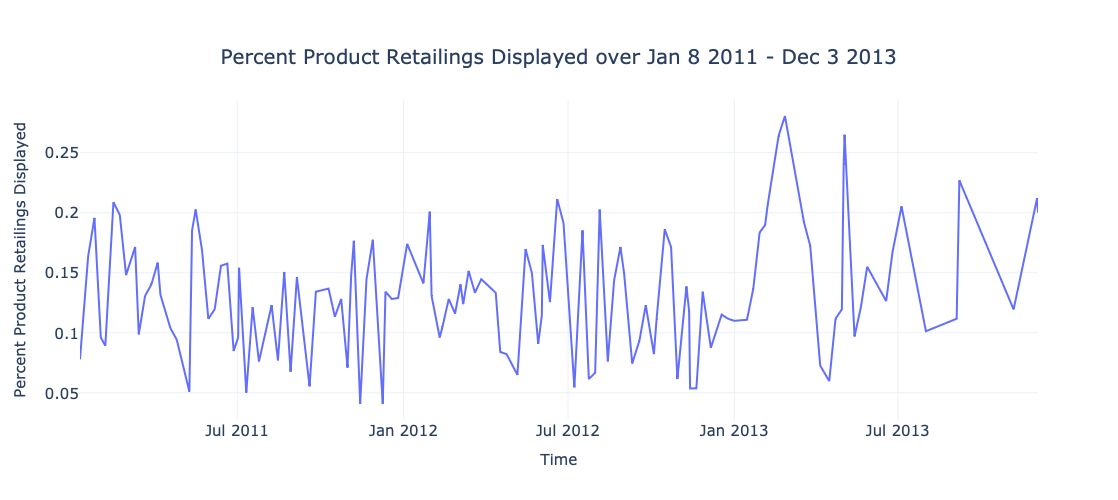

[45]

In [22]:
#Line chart - percent of retailings of products recorded where products were displayed prominently

#timestamp:
#ts_df.index = date of record (day in a given week when record made) (numeric, time series)

# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#Check path:
#for p in sys.path: print(p)
#Add src to path:
# sys.path.insert(0, '/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src')
#for p in sys.path: print(p)

fig = px.line(ts_df, y="percent_display", title="Percent Product Retailings Displayed over Jan 8 2011 - Dec 3 2013")
fig = format_plot(fig, ylabel="Percent Product Retailings Displayed")
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_percent_featured_line_plot.png")
fig.show()

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

#Calculate seasonal period:
seasonal_period_list = []
from matrixprofile import *
pattern = ts_df.percent_display
pattern = pattern.to_numpy()
m = 5 #size of sub-sequences to compare for conserved features
mp = matrixProfile.stomp(pattern, m)
for ele in range(len(list(mp[1]))):
    if mp[1][ele] == float('inf'):
        #https://www.geeksforgeeks.org/python-infinity/https://codedamn.com/news/python/how-to-represent-infinity-in-python#
        #Accessed 14/06/2024
        mp[1][ele] = 0
mtfs , motif_d  = motifs.motifs(pattern, mp, max_motifs=10)
#mtfs = list of lists where each list is a motif with the indices of where each instance of the motif begins
#motif_d = how conserved each motif is
for ele in range(len(mtfs)):
    if len(mtfs[ele]) >= 3: #need two complete cycles for imputation = 3 indices of conserved features from the repeating motif
        motif = motif_d.index(min(motif_d[:(ele + 1)])) #best motif_d = most conserved
        dist_list = []
        for instance in range(len(mtfs[motif]) - 1):
            inst_current = mtfs[motif][instance]
            inst_next = mtfs[motif][instance + 1]
            dist_timestamps = inst_next - inst_current
            dist_list.append(dist_timestamps)
        seasonal_per = statistics.median(dist_list) #(typical value as a measure of central tendency for a skewed or symmeteric 
        #(median = mean (1)) distribution):    
        #^(1) - https://online.stat.psu.edu/stat200/lesson/2/2.2/2.2.4/2.2.4.1
        seasonal_period_list.append(seasonal_per)
    else:
        seasonal_period_list.append('not seasonal')
#^https://stackoverflow.com/questions/49873443/repeated-patterns-in-time-series-graphs - learned of Matrix Profile method
#Accessed 14/06/2024
#^http://www.cs.ucr.edu/~eamonn/Matrix_Profile_Tutorial_Part1.pdf - understood principles of Matrix Profile method
#Accessed 14/06/2024
#^http://www.cs.ucr.edu/~eamonn/MatrixProfile.html - found link to python package implementing Matrix Profile method, matrixprofile-ts
#Accessed 14/06/2024
#^https://github.com/target/matrixprofile-ts/blob/master/docs/examples/Motif%20Discovery.ipynb , https://github.com/target/matrixprofile-ts/blob/master/matrixprofile/matrixProfile.py
#Found source code and adapted it for calculating seasonal period from identified motifs
#Accessed 14/06/2024
#Find unique seasons:
entry_list = seasonal_period_list
found_list = []
unique_list = []
entry = []
entry_list_length = len(seasonal_period_list)
for i in range(entry_list_length):
    entry = entry_list[i]
    if entry not in found_list:
        unique_list.append(entry)
        found_list.append(entry)
unique_list
loopcount = len(unique_list)
i = 0
while i < loopcount:
    #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
    #Accessed 03/06/2024
    var = unique_list[i]
    if isinstance(var, str) == True:
        #^https://pythonprinciples.com/blog/check-if-var-is-string/
        #Accessed 14/06/2024
        unique_list.remove(unique_list[i])
        loopcount = int(loopcount - 1)
        #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
        #Accessed 03/06/2024
    i += 1
    #^https://stackoverflow.com/questions/11905606/changing-the-number-of-iterations-in-a-for-loop
    #Accessed 03/06/2024  
if not unique_list:
    seasonal_per = 'not seasonal'
#^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
#Accessed 14/06/2024
else:
    for item in range(len(unique_list)):
        if unique_list[item] > (len(ts_df)/2): #need min observations for 2 cycles of the season to be valid
            del unique_list[item]
            #^https://note.nkmk.me/en/python-list-clear-pop-remove-del/#remove-items-by-index-or-slice-del
            #Accessed 23/06/2024
    if not unique_list:
        seasonal_per = 'not seasonal'
        #^https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
        #Accessed 14/06/2024
    else:
        seasonal_per = unique_list #without domain knowledge; interpolator function as defined from source code can only take a single integer seasonal period argument, see below
#- https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/495cd6275ca3f3fd9951348d63fc0020a0f43636/src/imputation/interpolation.py
seasonal_per

Observations: 45-week season

# EDA STEP 2: Multivariate Line Charts against time

Multivariate line chart - median sales price and median base price

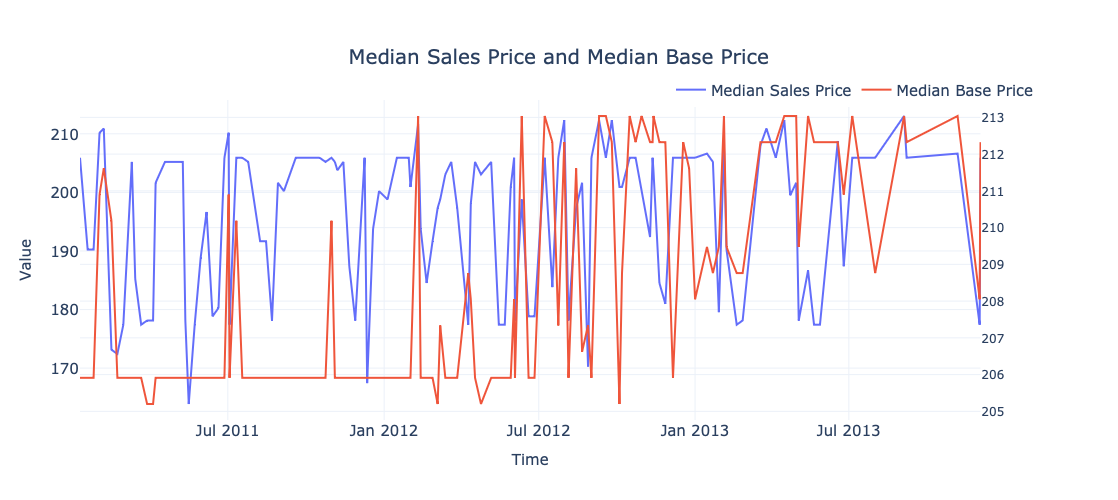

In [123]:
#Multivariate line chart - median sales price and median base price

#timestamp:
#ts_df.index = date of record (day in a given week when record made) (numeric, time series) 

# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#Check path:
#for p in sys.path: print(p)
#Add src to path:
# sys.path.insert(0, '/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src')
#for p in sys.path: print(p)

from src.utils import plotting_utils
#zoom_window = slice("2011-01-08", "2013-12-03")
fig = plotting_utils.two_line_plot_secondary_axis(x=ts_df.index, #or ts_df[zoom_window].index
                                   y1=ts_df.median_total_price, #or ts_df[zoom_window].median_total_price 
                                   y2=ts_df.median_base_price, #or ts_df[zoom_window].median_base_price
                                   y1_name="Median Sales Price", 
                                   y2_name="Median Base Price", 
                                   title="Median Sales Price and Median Base Price", 
                                   # greyscale=True,
                                  dash_secondary=False)
fig.update_layout(legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ))
fig.write_image('/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_median_total_price_vs_median_base_price.png')
fig.show()

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: some relationship where an increase in base price is followed with a slight delay by a drop in sales price once the base price drops again (company absorbs base price increases, when base prices drop again company lowers sales prices)

Multivariate line chart - median sales price and median units sold

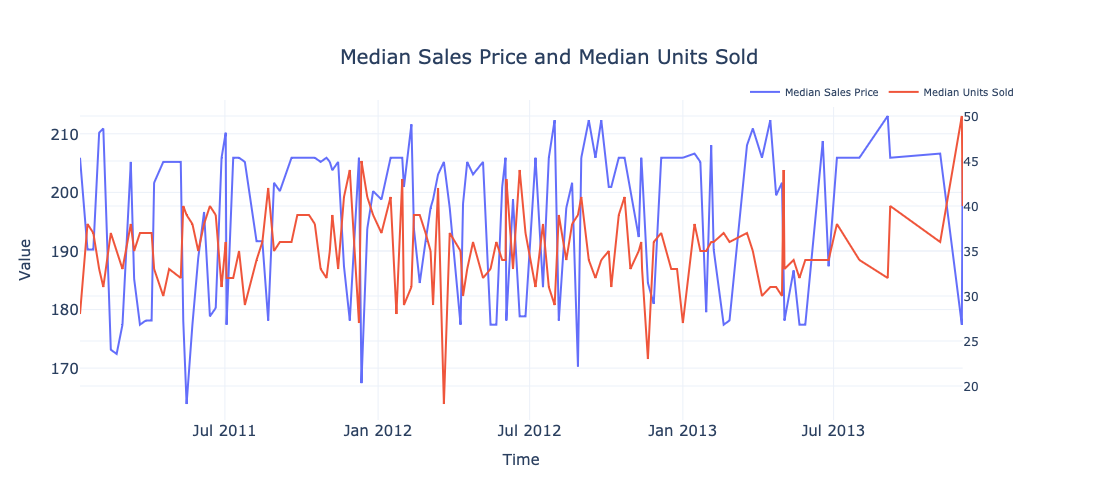

In [124]:
#Multivariate line chart - median sales price and median units sold 

#timestamp:
#ts_df.index = date of record (day in a given week when record made) (numeric, time series) 

# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)


#Check path:
#for p in sys.path: print(p)
#Add src to path:
# sys.path.insert(0, '/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src')
#for p in sys.path: print(p)

from src.utils import plotting_utils
#zoom_window = slice("2011-01-08", "2013-12-03")
fig = plotting_utils.two_line_plot_secondary_axis(x=ts_df.index, #or ts_df[zoom_window].index
                                   y1=ts_df.median_total_price, #or ts_df[zoom_window].median_total_price 
                                   y2=ts_df.median_units_sold, #or ts_df[zoom_window].median_units_sold
                                   y1_name="Median Sales Price", 
                                   y2_name="Median Units Sold", 
                                   title="Median Sales Price and Median Units Sold", 
                                   # greyscale=True,
                                  dash_secondary=False)
fig.update_layout(legend=dict(
                font=dict(size=10),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ))
fig.write_image('/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_median_total_price_vs_median_units_sold.png')
fig.show()

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: some relationship where low sales price coincides with higher numbers of units sold and vice versa (lower sales price coincides with more sales)

Multivariate line chart - median base price and median units sold

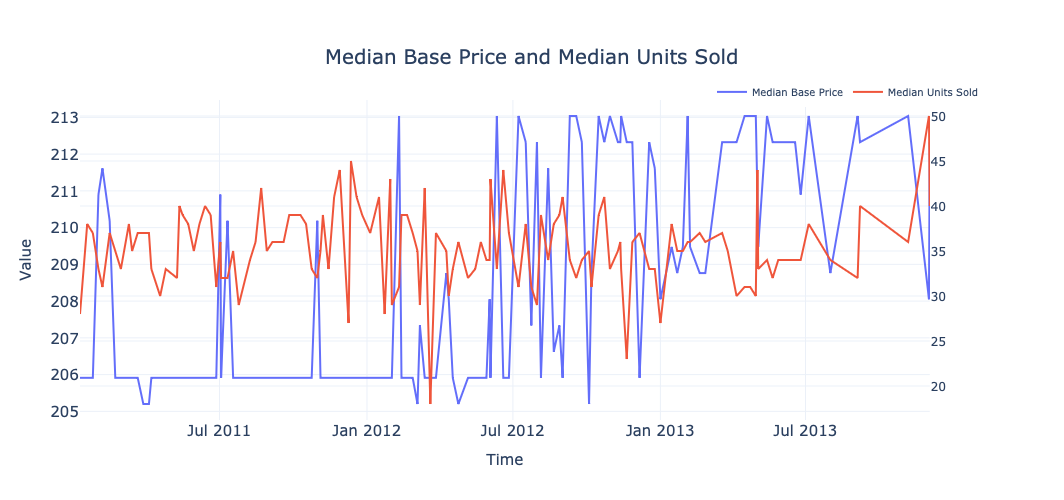

In [125]:
#Multivariate line chart - median base price and median units sold

#timestamp:
#ts_df.index = date of record (day in a given week when record made) (numeric, time series) 

# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#Check path:
#for p in sys.path: print(p)
#Add src to path:
# sys.path.insert(0, '/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src')
#for p in sys.path: print(p)

from src.utils import plotting_utils
#zoom_window = slice("2011-01-08", "2013-12-03")
fig = plotting_utils.two_line_plot_secondary_axis(x=ts_df.index, #or ts_df[zoom_window].index
                                   y1=ts_df.median_base_price, #or ts_df[zoom_window].median_base_price
                                   y2=ts_df.median_units_sold, #or ts_df[zoom_window].median_units_sold
                                   y1_name="Median Base Price", 
                                   y2_name="Median Units Sold", 
                                   title="Median Base Price and Median Units Sold", 
                                   # greyscale=True,
                                  dash_secondary=False)
fig.update_layout(legend=dict(
                font=dict(size=10),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ))
fig.write_image('/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_median_base_price_vs_median_units_sold.png')
fig.show()

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: some relationship where low base prices coincide with higher numbers of units sold and vice versa (lower base price coincides with more sales)

Multivariate line chart - median sales price and percent featured

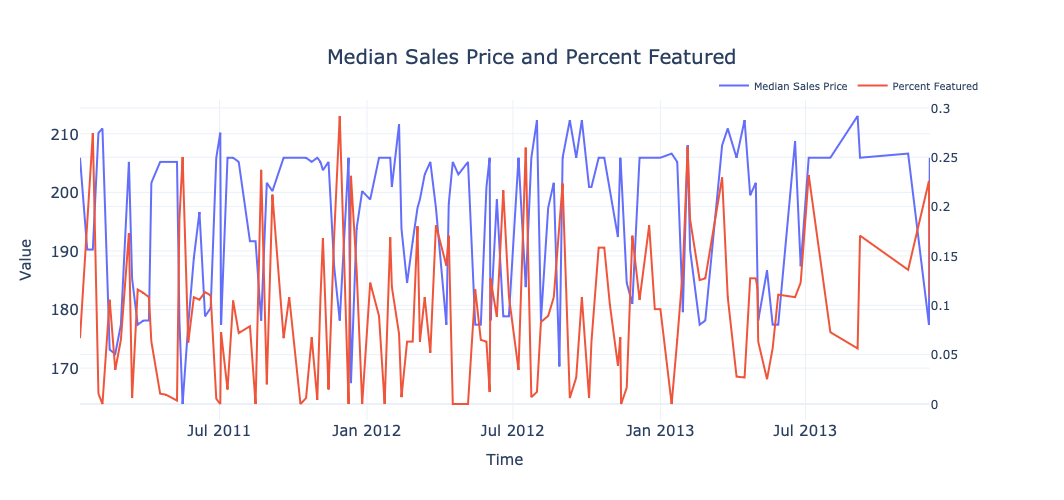

In [126]:
#Multivariate line chart - median sales price and percent featured

#timestamp:
#ts_df.index = date of record (day in a given week when record made) (numeric, time series) 

# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#Check path:
#for p in sys.path: print(p)
#Add src to path:
# sys.path.insert(0, '/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src')
#for p in sys.path: print(p)

from src.utils import plotting_utils
#zoom_window = slice("2011-01-08", "2013-12-03")
fig = plotting_utils.two_line_plot_secondary_axis(x=ts_df.index, #or ts_df[zoom_window].index
                                   y1=ts_df.median_total_price, #or ts_df[zoom_window].median_total_price
                                   y2=ts_df.percent_featured, #or ts_df[zoom_window].percent_featured
                                   y1_name="Median Sales Price", 
                                   y2_name="Percent Featured", 
                                   title="Median Sales Price and Percent Featured", 
                                   # greyscale=True,
                                  dash_secondary=False)
fig.update_layout(legend=dict(
                font=dict(size=10),
                orientation="h",
                yanchor="bottom",
                y=1,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ))
fig.write_image('/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_median_total_price_vs_percent_featured.png')
fig.show()

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: some relationship where low sales prices coincide with high percentage of items featured and vice versa (more featured items coincides with lower prices, likely part of featuring sales strategy to have lower prices for those featured items of course)

Multivariate line chart - median sales price and percent displayed

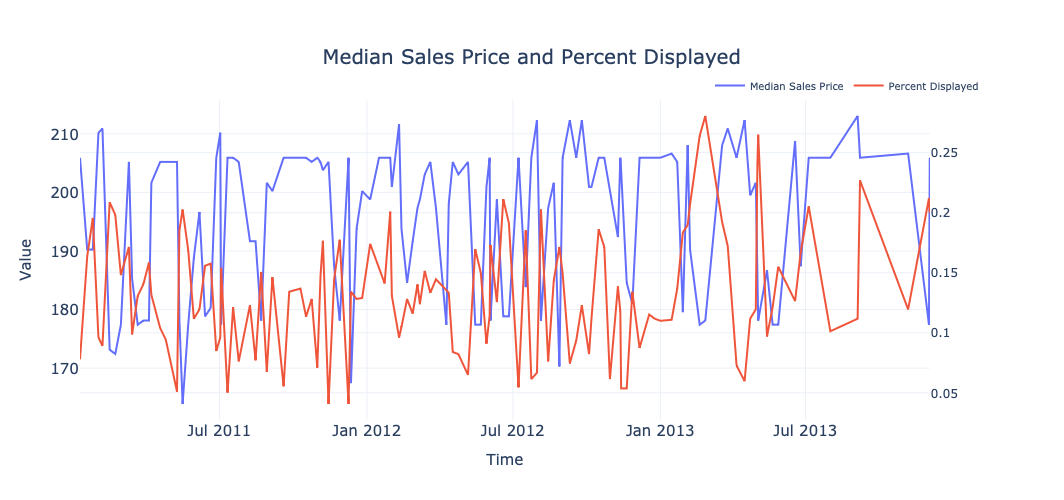

In [127]:
#Multivariate line chart - median sales price and percent displayed

#timestamp:
#ts_df.index = date of record (day in a given week when record made) (numeric, time series)

# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#Check path:
#for p in sys.path: print(p)
#Add src to path:
# sys.path.insert(0, '/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src')
#for p in sys.path: print(p)

from src.utils import plotting_utils
#zoom_window = slice("2011-01-08", "2013-12-03")
fig = plotting_utils.two_line_plot_secondary_axis(x=ts_df.index, #or ts_df[zoom_window].index
                                   y1=ts_df.median_total_price, #or ts_df[zoom_window].median_total_price
                                   y2=ts_df.percent_display, #or ts_df[zoom_window].percent_display
                                   y1_name="Median Sales Price", 
                                   y2_name="Percent Displayed", 
                                   title="Median Sales Price and Percent Displayed", 
                                   # greyscale=True,
                                  dash_secondary=False)
fig.update_layout(legend=dict(
                font=dict(size=10),
                orientation="h",
                yanchor="bottom",
                y=1,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ))
fig.write_image('/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_median_total_price_vs_percent_display.png')
fig.show()

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: some relationship where low sales prices coincide with high percentage of items displayed prominently and vice versa (more featured items coincides with lower prices, likely part of display sales strategy to have lower prices for those displayed items of course so they further catch the eye and sell)

Multivariate line chart - median base price and percent featured

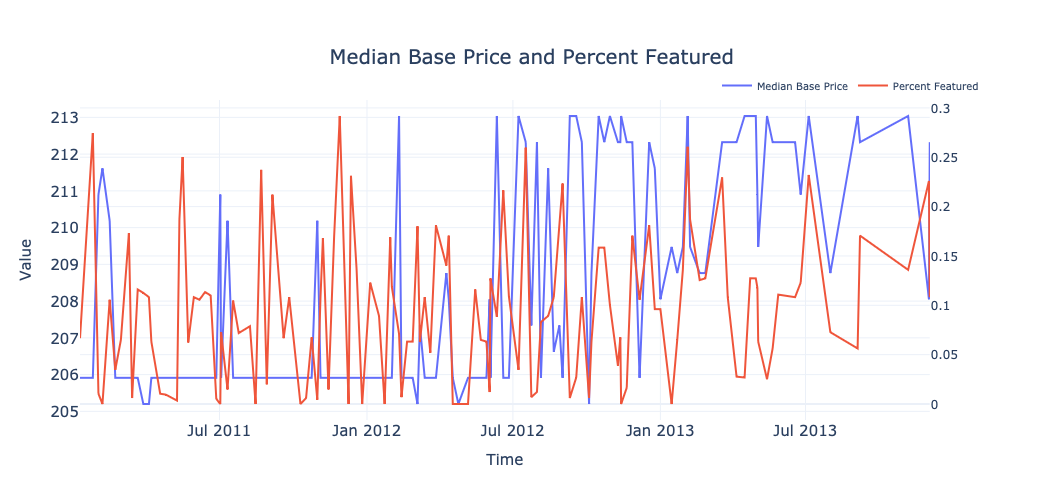

In [128]:
#Multivariate line chart - median base price and percent featured

#timestamp:
#ts_df.index = date of record (day in a given week when record made) (numeric, time series) 

# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#Check path:
#for p in sys.path: print(p)
#Add src to path:
# sys.path.insert(0, '/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src')
#for p in sys.path: print(p)

from src.utils import plotting_utils
#zoom_window = slice("2011-01-08", "2013-12-03")
fig = plotting_utils.two_line_plot_secondary_axis(x=ts_df.index, #or ts_df[zoom_window].index
                                   y1=ts_df.median_base_price, #or ts_df[zoom_window].median_base_price
                                   y2=ts_df.percent_featured, #or ts_df[zoom_window].percent_featured
                                   y1_name="Median Base Price", 
                                   y2_name="Percent Featured", 
                                   title="Median Base Price and Percent Featured", 
                                   # greyscale=True,
                                  dash_secondary=False)
fig.update_layout(legend=dict(
                font=dict(size=10),
                orientation="h",
                yanchor="bottom",
                y=1,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ))
fig.write_image('/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_median_base_price_vs_percent_featured.png')
fig.show()

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: some relationship up to Oct 2012 where high base prices follow after a delay high percentage of items featured (possibly after featured items are selling well the base price is raised to make more profit?); after Oct 2012 low % featured corresponds to high base prices (possibly change in strategy to default position of featured items having low base prices to keep sales prices low to attract more sales, therefore meaning low % of featured items coincides with higher base prices) and vice versa

Multivariate line chart - median base price and percent displayed

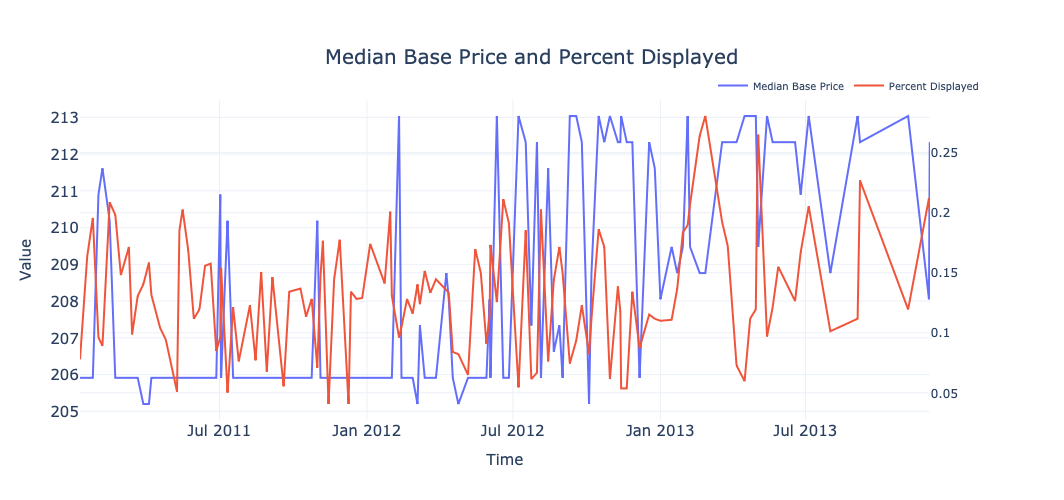

In [129]:
#Multivariate line chart - median base price and percent displayed

#timestamp:
#ts_df.index = date of record (day in a given week when record made) (numeric, time series) 

# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#Check path:
#for p in sys.path: print(p)
#Add src to path:
# sys.path.insert(0, '/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src')
#for p in sys.path: print(p)

from src.utils import plotting_utils
#zoom_window = slice("2011-01-08", "2013-12-03")
fig = plotting_utils.two_line_plot_secondary_axis(x=ts_df.index, #or ts_df[zoom_window].index
                                   y1=ts_df.median_base_price, #or ts_df[zoom_window].median_base_price
                                   y2=ts_df.percent_display, #or ts_df[zoom_window].percent_display
                                   y1_name="Median Base Price", 
                                   y2_name="Percent Displayed", 
                                   title="Median Base Price and Percent Displayed", 
                                   # greyscale=True,
                                  dash_secondary=False)
fig.update_layout(legend=dict(
                font=dict(size=10),
                orientation="h",
                yanchor="bottom",
                y=1,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ))
fig.write_image('/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_median_base_price_vs_percent_displayed.png')
fig.show()

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: some relationship where low base prices coincide with higher % displayed and vice versa (displayed items have lower base prices to keep sales prices low and attract more sales when they are prominently seen)

Multivariate line chart - median units sold and percent featured

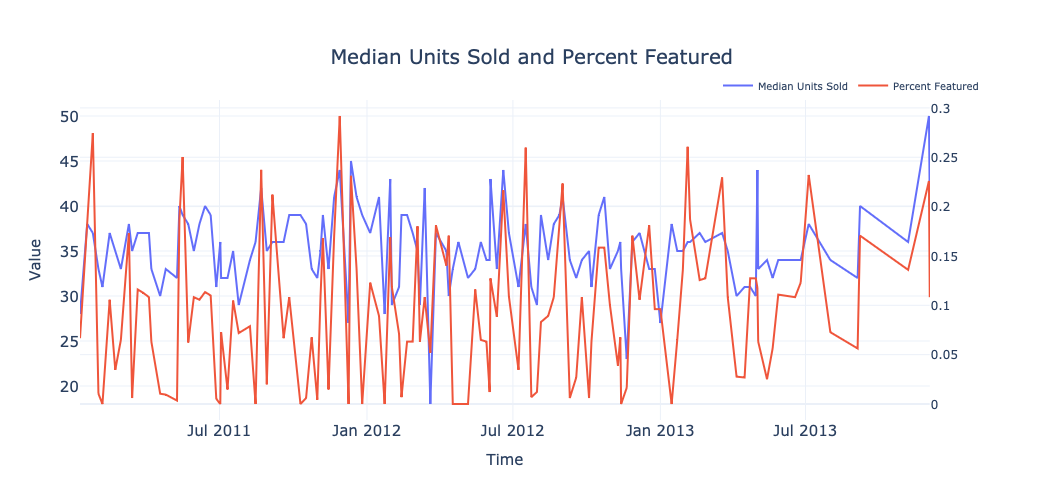

In [130]:
#Multivariate line chart - median units sold and percent featured

#timestamp:
#ts_df.index = date of record (day in a given week when record made) (numeric, time series)

# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#Check path:
#for p in sys.path: print(p)
#Add src to path:
# sys.path.insert(0, '/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src')
#for p in sys.path: print(p)

from src.utils import plotting_utils
#zoom_window = slice("2011-01-08", "2013-12-03")
fig = plotting_utils.two_line_plot_secondary_axis(x=ts_df.index, #or ts_df[zoom_window].index
                                   y1=ts_df.median_units_sold, #or ts_df[zoom_window].median_units_sold
                                   y2=ts_df.percent_featured, #or ts_df[zoom_window].percent_featured
                                   y1_name="Median Units Sold", 
                                   y2_name="Percent Featured", 
                                   title="Median Units Sold and Percent Featured", 
                                   # greyscale=True,
                                  dash_secondary=False)
fig.update_layout(legend=dict(
                font=dict(size=10),
                orientation="h",
                yanchor="bottom",
                y=1,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ))
fig.write_image('/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_median_units_sold_vs_percent_featured.png')
fig.show()

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: some relationship where high units sold coincide with higher % featured and vice versa (featuring items helps them sell)

Multivariate line chart - median units sold and percent displayed

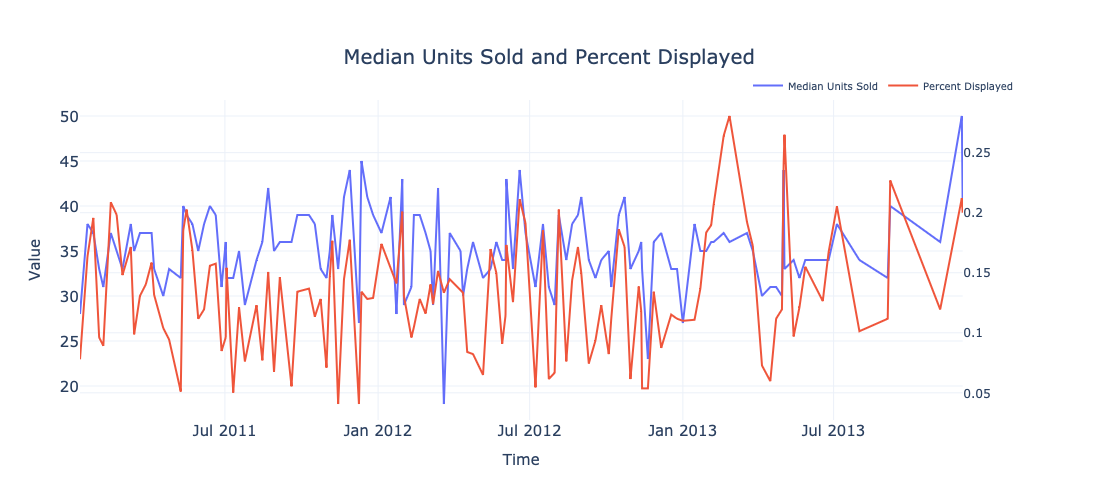

In [131]:
#Multivariate line chart - median units sold and percent displayed

#timestamp:
#ts_df.index = date of record (day in a given week when record made) (numeric, time series) 

# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#Check path:
#for p in sys.path: print(p)
#Add src to path:
# sys.path.insert(0, '/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src')
#for p in sys.path: print(p)

from src.utils import plotting_utils
#zoom_window = slice("2011-01-08", "2013-12-03")
fig = plotting_utils.two_line_plot_secondary_axis(x=ts_df.index, #or ts_df[zoom_window].index
                                   y1=ts_df.median_units_sold, #or ts_df[zoom_window].median_units_sold
                                   y2=ts_df.percent_display, #or ts_df[zoom_window].percent_display
                                   y1_name="Median Units Sold", 
                                   y2_name="Percent Displayed", 
                                   title="Median Units Sold and Percent Displayed", 
                                   # greyscale=True,
                                  dash_secondary=False)
fig.update_layout(legend=dict(
                font=dict(size=10),
                orientation="h",
                yanchor="bottom",
                y=1,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ))
fig.write_image('/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_median_units_sold_vs_percent_display.png')
fig.show()

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: some relationship where high units sold coincide with higher % displayed and vice versa (displaying items helps them sell)

Multivariate line chart - percent featured and percent displayed

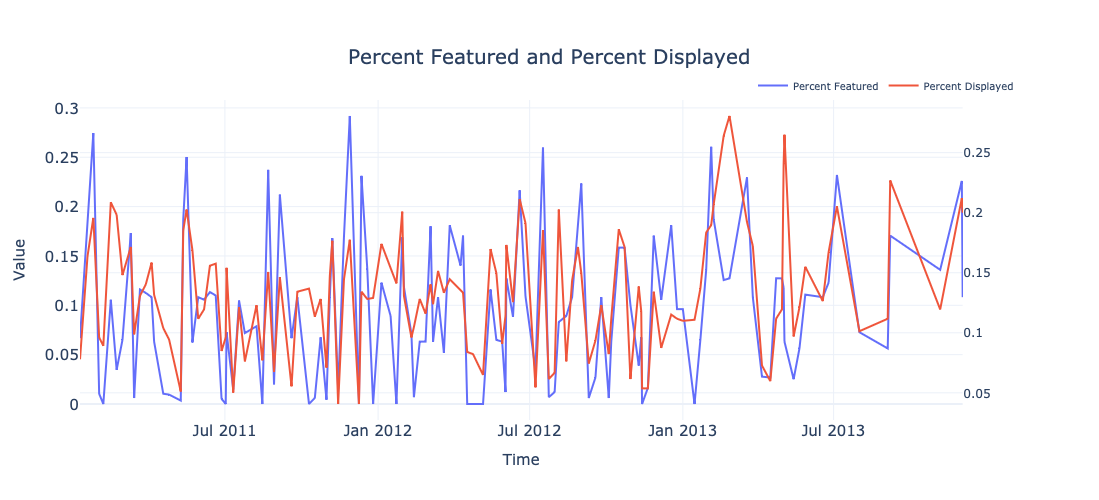

In [132]:
#Multivariate line chart - percent featured and percent displayed

#timestamp:
#ts_df.index = date of record (day in a given week when record made) (numeric, time series)

# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#Check path:
#for p in sys.path: print(p)
#Add src to path:
# sys.path.insert(0, '/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src')
#for p in sys.path: print(p)

from src.utils import plotting_utils
#zoom_window = slice("2011-01-08", "2013-12-03")
fig = plotting_utils.two_line_plot_secondary_axis(x=ts_df.index, #or ts_df[zoom_window].index
                                   y1=ts_df.percent_featured, #or ts_df[zoom_window].percent_featured
                                   y2=ts_df.percent_display, #or ts_df[zoom_window].percent_display
                                   y1_name="Percent Featured", 
                                   y2_name="Percent Displayed", 
                                   title="Percent Featured and Percent Displayed", 
                                   # greyscale=True,
                                  dash_secondary=False)
fig.update_layout(legend=dict(
                font=dict(size=10),
                orientation="h",
                yanchor="bottom",
                y=1,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ))
fig.write_image('/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_percent_featured_vs_percent_display.png')
fig.show()

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: some relationship where high % featured coincides with higher % displayed and vice versa (increases in featuring of items occur as a strategy in tandem with increases in prominent displaying of items as a whole strategy to increase sales and profit)

# EDA STEP 3: Seasonal Plots at varying time resolutions

Group median data for seasonal plots (can't assume data is symmetric per bin so median more robust to outliers if data may not be symmetric)(citation needed):

Impute missing values for October 2013:

In [7]:
from src.imputation.interpolation import SeasonalInterpolation
import datetime
new_row_data = []
for i in range(6):
    new_row_data.append(np.nan)
    #^https://www.analyticsvidhya.com/blog/2023/12/supercharge-your-dataframes-mastering-row-appending-in-pandas/#:~:text=The%20append()%20function%20in,for%20beginners%20and%20seasoned%20professionals.&text=While%20this%20method%20is%20simple,multiple%20rows%20in%20a%20loop
    #Accessed 04/06/2024
print(new_row_data)
print(len(new_row_data))
ts_df_2 = eda_ts_df.copy()
timestamp = '09/07/2013'
index_list = []
for date in range(7):
    timestamp = pd.to_datetime(timestamp) + pd.DateOffset(days=7)
    index_list.insert(date, timestamp)
#^https://stackoverflow.com/questions/6871016/adding-days-to-a-date-in-python
#Accessed 09/06/2024
print(index_list)
from pandas import DataFrame, concat
for row in range(7):
    line = DataFrame(np.array([new_row_data]), columns=['timestamp', 'median_total_price', 'median_base_price', 'median_units_sold', 'percent_featured', 'percent_display'])
    ts_df_2 = concat([ts_df_2.iloc[:126 + row + 1], line, ts_df_2.iloc[row + 126 + 1:]]).reset_index(drop=True)
    #^https://stackoverflow.com/questions/15888648/is-it-possible-to-insert-a-row-at-an-arbitrary-position-in-a-dataframe-using-pan
    #Accessed 03/06/2024
    ts_df_2.loc[row + 126 + 1, ts_df_2.columns.values[0]] = index_list[row]
print(ts_df_2.info())
#data approx. every week - for median_total_price season 64 weeks:
ts_df_2['median_total_price'] = SeasonalInterpolation(seasonal_period=64).fit_transform(ts_df_2.median_total_price.values.reshape(-1,1))
#data approx. every week - for median_base_price not seasonal:
for row in range(len(ts_df_2)):
    if pd.isnull(ts_df_2['median_base_price'][row]):
        ts_df_2['median_base_price'][row] = statistics.median(ts_df_2['median_base_price'][:row]) #impute with the median as a heuristic instead;
#(typical value as a measure of central tendency for a skewed or symmeteric (median = mean (1)) distribution):
#^(1) - https://online.stat.psu.edu/stat200/lesson/2/2.2/2.2.4/2.2.4.1
#Accessed 13/06/2024
#data approx. every week - for median_base_price assume season 35 weeks:
ts_df_2['median_units_sold'] = SeasonalInterpolation(seasonal_period=35).fit_transform(ts_df_2.median_units_sold.values.reshape(-1,1))
#data approx. every week - for percent_featured season 13 weeks:
ts_df_2['percent_featured'] = SeasonalInterpolation(seasonal_period=13).fit_transform(ts_df_2.percent_featured.values.reshape(-1,1))
#data approx. every week - for percent_display season 45 weeks:
ts_df_2['percent_display'] = SeasonalInterpolation(seasonal_period=45).fit_transform(ts_df_2.percent_display.values.reshape(-1,1))
#to avoid negative imputed values:
for row in range(len(ts_df_2)):
    if ts_df_2['median_total_price'][row] < 0:
        ts_df_2['median_total_price'][row] = statistics.median(ts_df_2['median_total_price'][:row]) #impute with the median as a heuristic
#to avoid negative imputed values:
for row in range(len(ts_df_2)):
    if ts_df_2['median_base_price'][row] < 0:
        ts_df_2['median_base_price'][row] = statistics.median(ts_df_2['median_base_price'][:row]) #impute with the median as a heuristic
#to avoid negative imputed values:
for row in range(len(ts_df_2)):
    if ts_df_2['median_units_sold'][row] < 0:
        ts_df_2['median_units_sold'][row] = statistics.median(ts_df_2['median_units_sold'][:row]) #impute with the median as a heuristic
#to avoid negative imputed values/values > 1 as values close to zero and 1:
for row in range(len(ts_df)):
    if ts_df_2['percent_featured'][row] < 0:
        ts_df_2['percent_featured'][row] = statistics.median(ts_df_2['percent_featured'][:row]) #impute with the median as a heuristic
    if ts_df_2['percent_featured'][row] > 1:
        ts_df_2['percent_featured'][row] = statistics.median(ts_df_2['percent_featured'][:row]) #impute with the median as a heuristic
#to avoid negative imputed values/values > 1 as values close to zero and 1:
for row in range(len(ts_df_2)):
    if ts_df_2['percent_display'][row] < 0:
        ts_df_2['percent_display'][row] = statistics.median(ts_df_2['percent_display'][:row]) #impute with the median as a heuristic
    if ts_df_2['percent_display'][row] > 1:
        ts_df_2['percent_display'][row] = statistics.median(ts_df_2['percent_display'][:row]) #impute with the median as a heuristic
print(ts_df_2.tail(20))

[nan, nan, nan, nan, nan, nan]
6
[Timestamp('2013-09-14 00:00:00'), Timestamp('2013-09-21 00:00:00'), Timestamp('2013-09-28 00:00:00'), Timestamp('2013-10-05 00:00:00'), Timestamp('2013-10-12 00:00:00'), Timestamp('2013-10-19 00:00:00'), Timestamp('2013-10-26 00:00:00')]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           137 non-null    datetime64[ns]
 1   median_total_price  130 non-null    float64       
 2   median_base_price   130 non-null    float64       
 3   median_units_sold   130 non-null    float64       
 4   percent_featured    130 non-null    float64       
 5   percent_display     130 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 6.6 KB
None
     timestamp  median_total_price  median_base_price  median_units_sold  \
117 2013-05-03          178.125000  

/tmp/ipykernel_37938/3061302023.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ts_df_2 = concat([ts_df_2.iloc[:126 + row + 1], line, ts_df_2.iloc[row + 126 + 1:]]).reset_index(drop=True)
/tmp/ipykernel_37938/3061302023.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df_2['median_base_price'][row] = statistics.median(ts_df_2['median_base_price'][:row]) #impute with the median as a heuristic instead;
/tmp/ipykernel_37938/3061302023.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

Re-create new df with imputed values allowing filtering of the data by time characteristics:

In [8]:
ts_df = ts_df_2.copy()
ts_df = ts_df.set_index("timestamp")
ts_df["weekday_name"] = ts_df.index.day_name()
ts_df["weekday"] = ts_df.index.weekday
ts_df["week"] = ts_df.index.isocalendar().week
ts_df["day"] = ts_df.index.day
ts_df["date"] = ts_df.index.date
ts_df["month"] = ts_df.index.month
ts_df["month_name"] = ts_df.index.month_name()
ts_df["year"] = ts_df.index.year
ts_df["week_of_month"] = pd.Series(np.zeros(len(ts_df)), index=ts_df.index)
from math import ceil
def get_week_of_month(date):
   first_day = date.replace(day=1)

   day_of_month = date.day

   if(first_day.weekday() == 6):
       adjusted_dom = (1 + first_day.weekday()) / 7
   else:
       adjusted_dom = day_of_month + first_day.weekday()

   return int(ceil(adjusted_dom/7.0))
#^https://stackoverflow.com/questions/3806473/week-number-of-the-month/26662038#26662038
#Accessed 10/06/2024
for row in range(len(ts_df_2)):
    ts_df["week_of_month"][row] = get_week_of_month(ts_df_2['timestamp'][row])
#Making ordered categoricals to make for sorted plots
ts_df['month_name'] = pd.Categorical(ts_df['month_name'], categories=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ordered=True)
ts_df['weekday_name'] = pd.Categorical(ts_df['weekday_name'], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
ts_df.head(60)
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

/tmp/ipykernel_37938/914192283.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df["week_of_month"][row] = get_week_of_month(ts_df_2['timestamp'][row])
/tmp/ipykernel_37938/914192283.py:27: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ts_df["week_of_month"][row] = get_week_of_month(ts_df_2['timestamp'][row])


median_total_price  median_base_price  median_units_sold  \
timestamp                                                              
2011-01-08            205.9125           205.9125               28.0   
2011-01-17            190.2375           205.9125               38.0   
2011-01-24            190.2375           205.9125               37.0   
2011-01-31            210.1875           210.9000               33.0   
2011-02-05            210.9000           211.6125               31.0   
2011-02-14            173.1375           210.1875               37.0   
2011-02-21            172.4250           205.9125               35.0   
2011-02-28            177.4125           205.9125               33.0   
2011-03-10            205.2000           205.9125               38.0   
2011-03-14            185.2500           205.9125               35.0   
2011-03-21            177.4125           205.9125               37.0   
2011-03-28            178.1250           205.2000               37.0   
2011-04-04            178.1250           205.2000               37.0   
2011-04-07            201.6375           205.9125               33.0   
2011-04-18            205.2000           205.9125               30.0   
2011-04-25            205.2000           205.9125               33.0   
2011-05-09            205.2000           205.9125               32.0   
2011-05-12            178.1250           205.9125               40.0   
2011-05-16            163.8750           205.9125               39.0   
2011-05-23            177.4125           205.9125               38.0   
2011-05-30            188.8125           205.9125               35.0   
2011-06-06            196.6500           205.9125               38.0   
2011-06-13            178.8375           205.9125               40.0   
2011-06-20            180.2625           205.9125               39.0   
2011-06-27            205.9125           205.9125               31.0   
2011-07-02            210.1875           210.9000               36.0   
2011-07-03            177.4125           205.9125               32.0   
2011-07-11            205.9125           210.1875               32.0   
2011-07-18            205.9125           205.9125               35.0   
2011-07-25            205.2000           205.9125               29.0   
2011-08-08            191.6625           205.9125               34.0   
2011-08-15            191.6625           205.9125               36.0   
2011-08-22            178.1250           205.9125               42.0   
2011-08-29            201.6375           205.9125               35.0   
2011-09-05            200.2125           205.9125               36.0   
2011-09-19            205.9125           205.9125               36.0   
2011-09-26            205.9125           205.9125               39.0   
2011-10-10            205.9125           205.9125               39.0   
2011-10-17            205.9125           205.9125               38.0   
2011-10-24            205.2000           205.9125               33.0   
2011-10-31            205.9125           210.1875               32.0   
2011-11-04            205.2000           205.9125               35.0   
2011-11-07            203.7750           205.9125               39.0   
2011-11-14            205.2000           205.9125               33.0   
2011-11-21            187.3875           205.9125               41.0   
2011-11-28            178.1250           205.9125               44.0   
2011-12-09            205.9125           205.9125               27.0   
2011-12-12            167.4375           205.9125               45.0   
2011-12-19            193.8000           205.9125               41.0   
2011-12-26            200.2125           205.9125               39.0   
2012-01-05            198.7875           205.9125               37.0   
2012-01-16            205.9125           205.9125               41.0   
2012-01-23            205.9125           205.9125               28.0   
2012-01-30            205.9125           205.9125   

In [9]:
import statistics
plot_df = ts_df.groupby(["year", "month_name"])[['median_total_price', 'median_base_price', 'median_units_sold', 'percent_featured', 'percent_display']].median().reset_index()
plot_df.head()
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

/tmp/ipykernel_37938/1831219901.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df = ts_df.groupby(["year", "month_name"])[['median_total_price', 'median_base_price', 'median_units_sold', 'percent_featured', 'percent_display']].median().reset_index()


year month_name  median_total_price  median_base_price  median_units_sold  \
0  2011    January           198.07500           205.9125               35.0   
1  2011   February           175.27500           208.0500               34.0   
2  2011      March           181.68750           205.9125               37.0   
3  2011      April           203.41875           205.9125               33.0   
4  2011        May           178.12500           205.9125               38.0   

   percent_featured  percent_display  
0          0.128139         0.129870  
1          0.049784         0.173160  
2          0.114286         0.135498  
3          0.036797         0.117749  
4          0.108225         0.168831

Check data for October 2013:

In [10]:
plot_df[plot_df['year'] == 2013]

year month_name  median_total_price  median_base_price  median_units_sold  \
24  2013    January          205.556250          209.11875          35.000000   
25  2013   February          184.181250          209.11875          36.000000   
26  2013      March          209.475000          212.32500          36.000000   
27  2013      April          203.775000          213.03750          30.500000   
28  2013        May          178.125000          212.32500          34.000000   
29  2013       June          198.075000          211.61250          34.000000   
30  2013       July          205.912500          213.03750          38.000000   
31  2013     August          205.912500          208.76250          34.000000   
32  2013  September          205.912500          205.91250          38.135714   
33  2013    October          216.068467          205.91250          36.833929   
34  2013   November          206.625000          213.03750          36.000000   
35  2013   December          191.662500          210.18750          45.000000   

    percent_featured  percent_display  
24          0.080519         0.123810  
25          0.157143         0.235498  
26          0.168831         0.182251  
27          0.077489         0.092256  
28          0.063203         0.154978  
29          0.115584         0.146753  
30          0.232035         0.205195  
31          0.072727         0.101299  
32          0.162978         0.182798  
33          0.153709         0.147964  
34          0.135931         0.119481  
35          0.167100         0.206061

Seasonal plot monthly - median sales price, binned per month using median value in month:

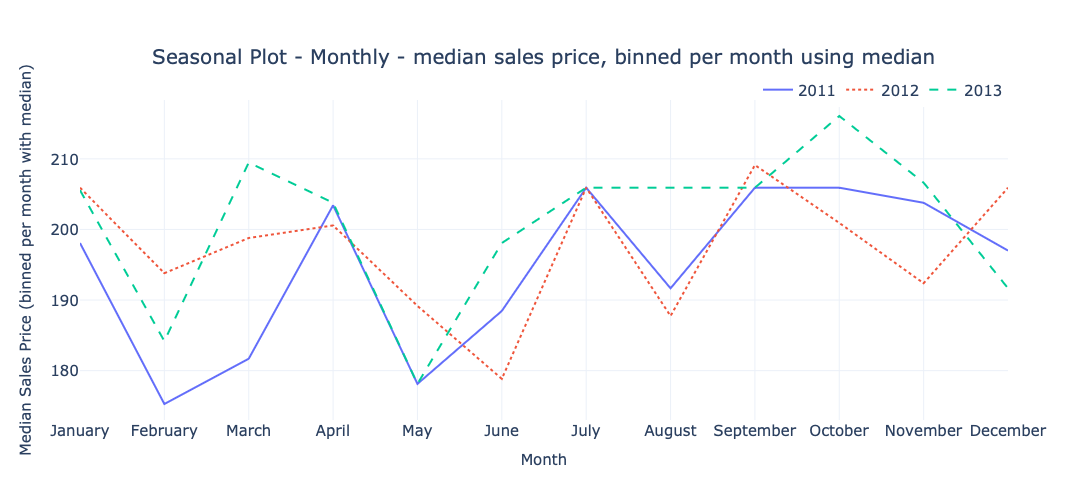

In [13]:
#seasonal plot monthly - median sales price
fig = px.line(plot_df, x="month_name", y='median_total_price', color="year", line_dash="year", title="Seasonal Plot - Monthly - median sales price, binned per month using median")
fig = format_plot(fig, ylabel="Median Sales Price (binned per month with median)", xlabel="Month")
fig.update_layout(legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ))
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_seasonal_plot_monthly_median_total_price.png")
fig.show()
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: seems there could be seasons every 3 months, 6 months, hard to tell

Seasonal plot monthly - median base price, binned per month using median value in month:

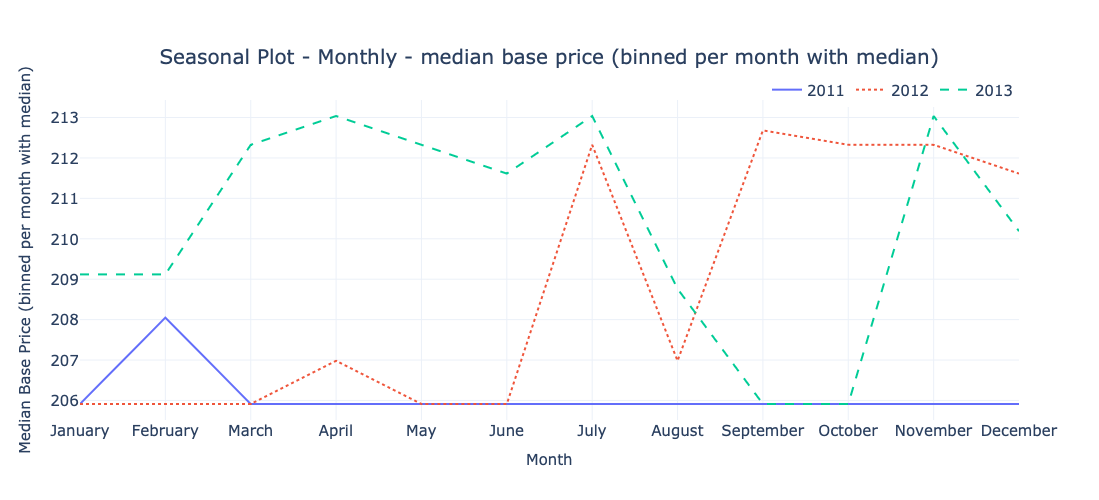

In [14]:
#seasonal plot monthly - median base price, binned per month using median value in month:
fig = px.line(plot_df, x="month_name", y='median_base_price', color="year", line_dash="year", title="Seasonal Plot - Monthly - median base price (binned per month with median)")
fig = format_plot(fig, ylabel="Median Base Price (binned per month with median)", xlabel="Month")
fig.update_layout(legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ))
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_seasonal_plot_monthly_median_base_price.png")
fig.show()
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: seems to be no annual pattern

Seasonal plot monthly - median units sold, binned per month using median value in month:

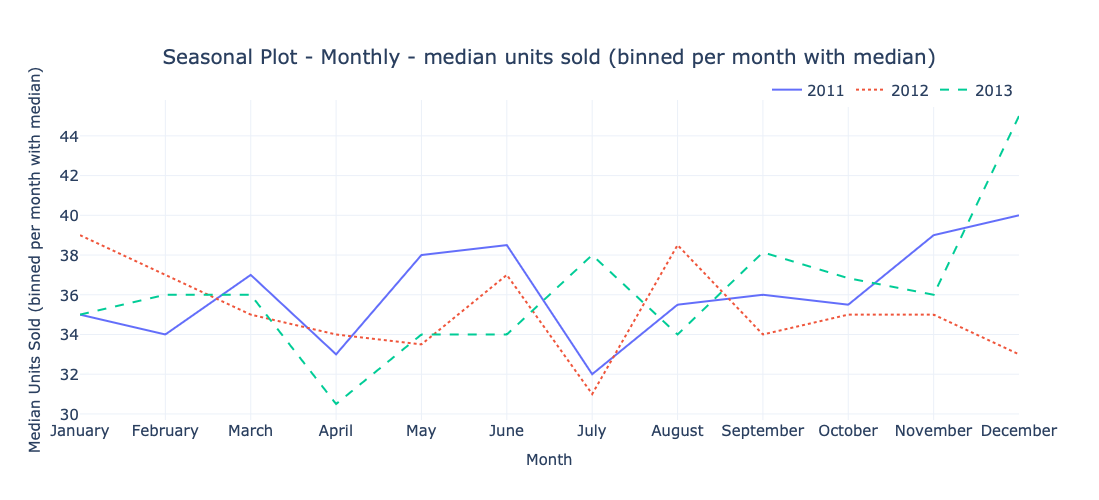

In [15]:
#seasonal plot monthly - median units sold, binned per month using median value in month
fig = px.line(plot_df, x="month_name", y='median_units_sold', color="year", line_dash="year", title="Seasonal Plot - Monthly - median units sold (binned per month with median)")
fig = format_plot(fig, ylabel="Median Units Sold (binned per month with median)", xlabel="Month")
fig.update_layout(legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ))
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_seasonal_plot_monthly_median_units_sold.png")
fig.show()
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: difficult to see consistent season here from the graph within a given year for the 3 years 

Seasonal plot monthly - percent featured, binned per month using median value in month:

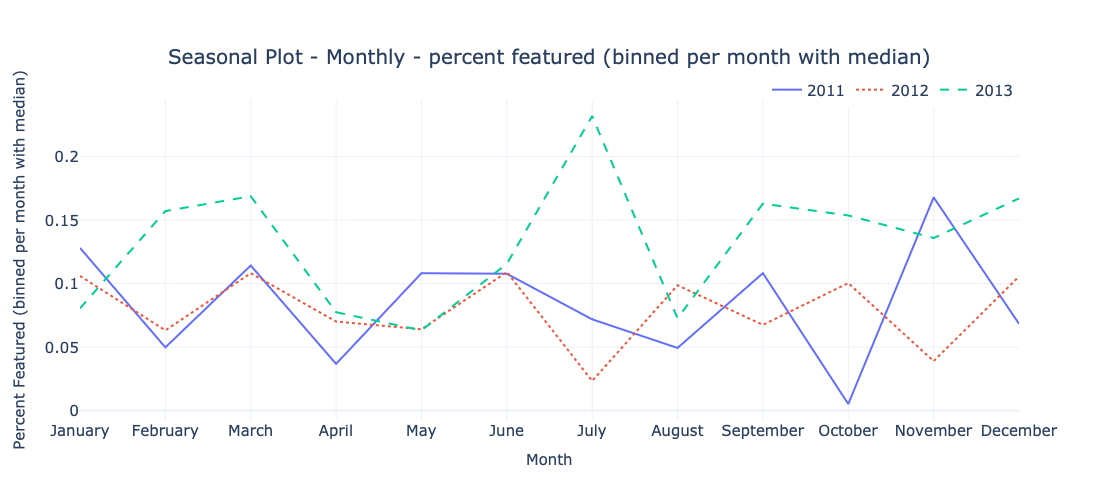

In [16]:
#seasonal plot monthly - percent featured, binned per month using median value in month:
fig = px.line(plot_df, x="month_name", y='percent_featured', color="year", line_dash="year", title="Seasonal Plot - Monthly - percent featured (binned per month with median)")
fig = format_plot(fig, ylabel="Percent Featured (binned per month with median)", xlabel="Month")
fig.update_layout(legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ))
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_seasonal_plot_monthly_percent_featured.png")
fig.show()
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: difficult to see consistent season here from the graph within a given year for the 3 years 

Seasonal plot monthly - percent displayed, binned per month using median value in month:

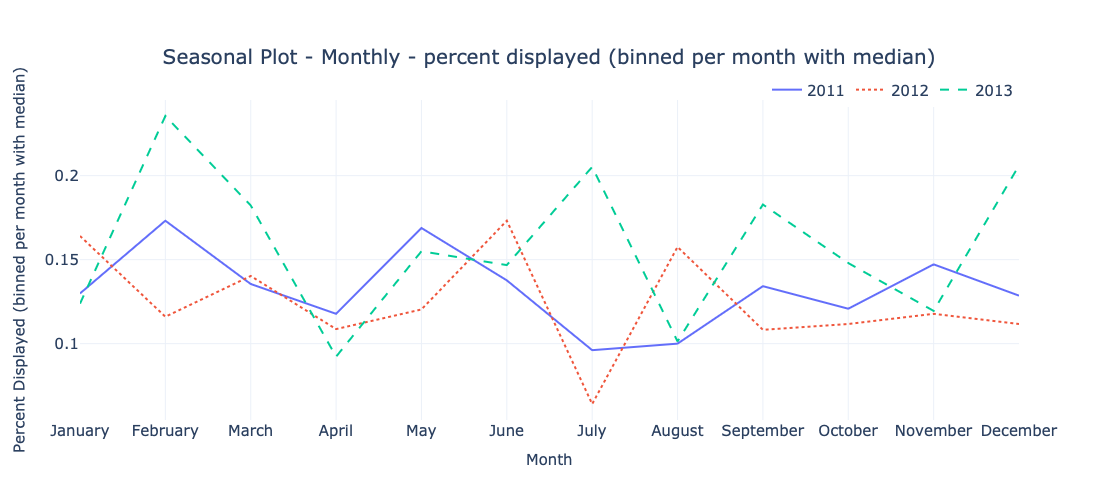

In [17]:
#seasonal plot monthly - percent displayed, binned per month using median value in month:
fig = px.line(plot_df, x="month_name", y='percent_display', color="year", line_dash="year", title="Seasonal Plot - Monthly - percent displayed (binned per month with median)")
fig = format_plot(fig, ylabel="Percent Displayed (binned per month with median)", xlabel="Month")
fig.update_layout(legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ))
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_seasonal_plot_monthly_percent_displayed.png")
fig.show()
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: difficult to see consistent season here from the graph within a given year for the 3 years 

Change resolution to shorter time-frames - is there multiple seasons, at different time resolutions?

Calculating the month-week of month median for weekly seasonality:

In [18]:
#Calculating the month-week of month median for weekly seasonality:
plot_df_2 = ts_df.groupby(["month_name", "week_of_month"])[['median_total_price', 'median_base_price', 'median_units_sold', 'percent_featured', 'percent_display']].median().reset_index()
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024
for i in plot_df_2.index:
    val = plot_df_2.loc[i, plot_df_2.columns.values[3]]
    if pd.isnull(val):
        plot_df_2.drop(i, inplace = True)
plot_df_2 = plot_df_2.set_index(np.arange(0, len(plot_df_2)))
plot_df_2.head()

/tmp/ipykernel_37938/2791679999.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



month_name  week_of_month  median_total_price  median_base_price  \
0    January            1.0           205.91250          205.91250   
1    January            2.0           205.91250          205.91250   
2    January            3.0           206.62500          209.47500   
3    January            4.0           197.71875          207.33750   
4    January            5.0           184.89375          207.69375   

   median_units_sold  percent_featured  percent_display  
0               37.0          0.096104         0.154113  
1               28.0          0.066667         0.077922  
2               38.0          0.000000         0.110823  
3               36.5          0.127273         0.150216  
4               36.0          0.205195         0.189610

In [19]:
plot_df_2.head(60)

month_name  week_of_month  median_total_price  median_base_price  \
0     January            1.0          205.912500          205.91250   
1     January            2.0          205.912500          205.91250   
2     January            3.0          206.625000          209.47500   
3     January            4.0          197.718750          207.33750   
4     January            5.0          184.893750          207.69375   
5     January            6.0          210.187500          210.90000   
6    February            1.0          205.912500          208.76250   
7    February            2.0          208.050000          213.03750   
8    February            3.0          183.468750          208.05000   
9    February            4.0          177.412500          205.91250   
10   February            5.0          178.125000          205.91250   
11      March            1.0          197.362500          205.20000   
12      March            2.0          201.993750          206.62500   
13      March            3.0          194.156250          205.91250   
14      March            4.0          205.200000          205.91250   
15      March            5.0          197.362500          205.91250   
16      April            1.0          203.062500          208.05000   
17      April            2.0          189.881250          205.55625   
18      April            3.0          212.325000          213.03750   
19      April            4.0          202.350000          209.47500   
20      April            5.0          203.418750          209.47500   
21        May            1.0          179.550000          205.91250   
22        May            3.0          182.043750          209.47500   
23        May            4.0          177.412500          209.11875   
24        May            5.0          189.168750          209.11875   
25       June            1.0          192.018750          206.98125   
26       June            2.0          196.650000          205.91250   
27       June            3.0          188.812500          209.47500   
28       June            4.0          180.262500          205.91250   
29       June            5.0          187.387500          205.91250   
30       July            1.0          205.912500          212.32500   
31       July            3.0          205.912500          210.18750   
32       July            4.0          205.912500          205.91250   
33       July            5.0          205.200000          205.91250   
34     August            1.0          192.018750          207.33750   
35     August            2.0          191.662500          205.91250   
36     August            3.0          194.512500          208.76250   
37     August            4.0          189.881250          206.26875   
38     August            5.0          185.962500          206.62500   
39  September            1.0          205.912500          205.91250   
40  September            2.0          200.212500          205.91250   
41  September            3.0          212.325000          213.03750   
42  September            4.0          205.912500          209.47500   
43  September            5.0          209.118750          209.11875   
44    October            1.0          200.925000          205.91250   
45    October            2.0          220.305156          205.91250   
46    October            3.0          205.912500          205.91250   
47    October            4.0          205.912500          205.91250   
48    October            5.0          202.706250          209.47500   
49    October            6.0          205.912500          210.18750   
50   November            1.0          205.200000          205.91250   
51   November            2.0          203.775000          212.32500   
52   November            3.0          205.200000          212.32500   
53   November            4.0          185.962500          209.11875   
54   November            5.0          179.550000          209.11875   
55   December            1.

Weekly seasonality - median sales price

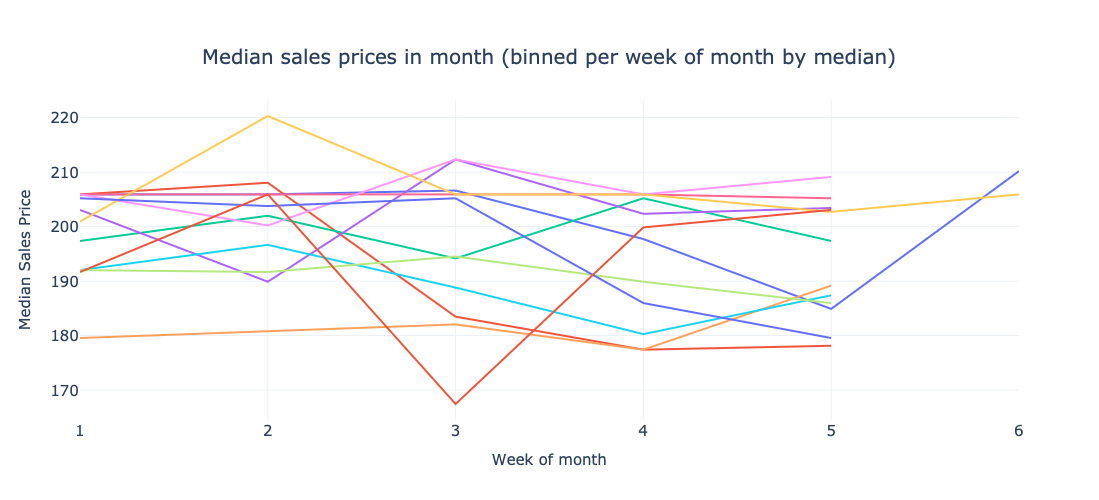

In [20]:
# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#weekly seasonality: median sales price

fig = px.line(plot_df_2[['median_total_price', "month_name", "week_of_month"]], y='median_total_price', x="week_of_month", color="month_name", title="Median sales prices in month (binned per week of month by median)")
fig = format_plot(fig, ylabel='Median Sales Price', xlabel="Week of month", legends=None)
fig.update_layout(showlegend=False) 
# plotting_utils.make_lines_greyscale(fig)
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_seasonal_plot_per_week_of_month_median_total_price.png")
fig.show()
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: difficult to make out any seasons in week of month from the graph

Weekly seasonality - median base price

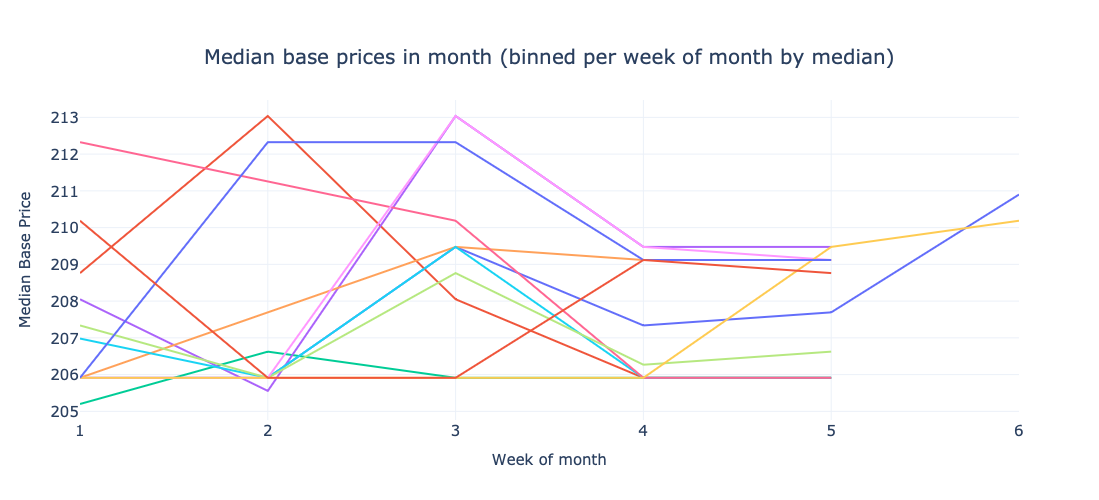

In [21]:
# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#weekly seasonality: median base price

fig = px.line(plot_df_2[['median_base_price', "month_name", "week_of_month"]], y='median_base_price', x="week_of_month", color="month_name", title="Median base prices in month (binned per week of month by median)")
fig = format_plot(fig, ylabel='Median Base Price', xlabel="Week of month", legends=None)
fig.update_layout(showlegend=False) 
# plotting_utils.make_lines_greyscale(fig)
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_seasonal_plot_per_week_of_month_median_base_price.png")
fig.show()
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: difficult to make out any seasons in week of month from the graph

Weekly seasonality - median units sold

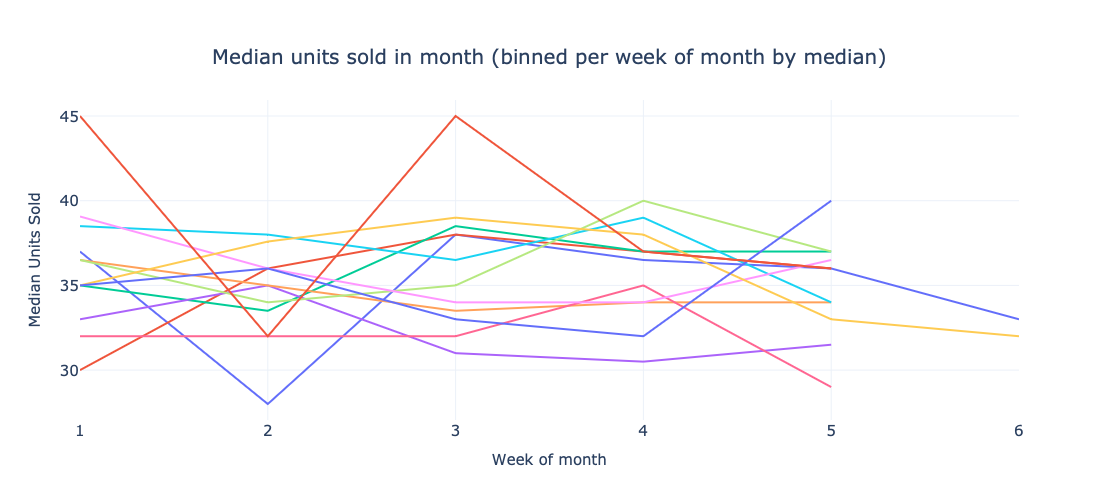

In [22]:
# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#weekly seasonality: median units sold

fig = px.line(plot_df_2[['median_units_sold', "month_name", "week_of_month"]], y='median_units_sold', x="week_of_month", color="month_name", title="Median units sold in month (binned per week of month by median)")
fig = format_plot(fig, ylabel='Median Units Sold', xlabel="Week of month", legends=None)
fig.update_layout(showlegend=False) 
# plotting_utils.make_lines_greyscale(fig)
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_seasonal_plot_per_week_of_month_median_units_sold.png")
fig.show()
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: difficult to make out any seasons in week of month from the graph

Weekly seasonality - percent featured

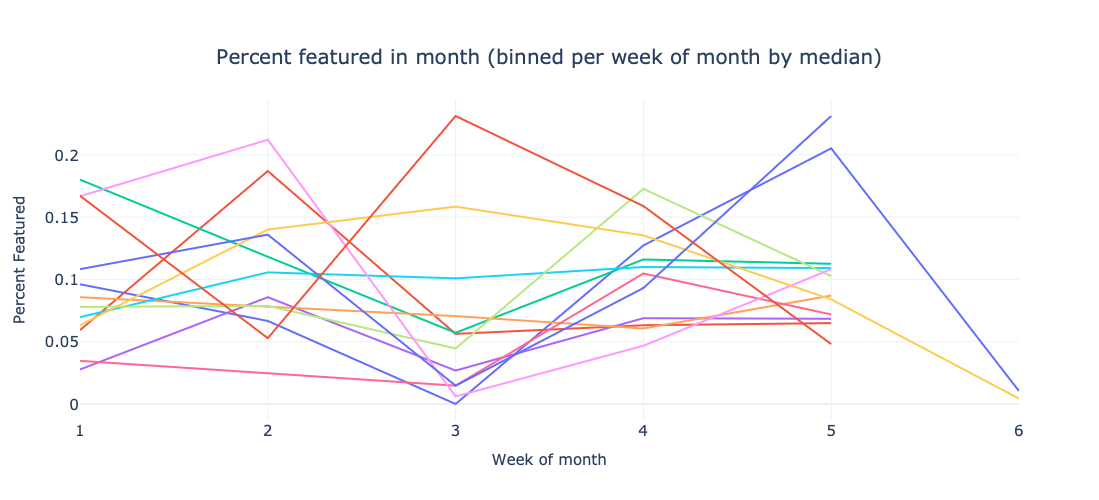

In [23]:
# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#weekly seasonality: percent featured

fig = px.line(plot_df_2[['percent_featured', "month_name", "week_of_month"]], y='percent_featured', x="week_of_month", color="month_name", title="Percent featured in month (binned per week of month by median)")
fig = format_plot(fig, ylabel='Percent Featured', xlabel="Week of month", legends=None)
fig.update_layout(showlegend=False) 
# plotting_utils.make_lines_greyscale(fig)
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_seasonal_plot_per_week_of_month_percent_featured.png")
fig.show()
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: a little difficult to make out any seasons in week of month from the graph - possibly seasonal behaviour repeats in 3rd week each month but not clear enough from this graph

Weekly seasonality - percent displayed

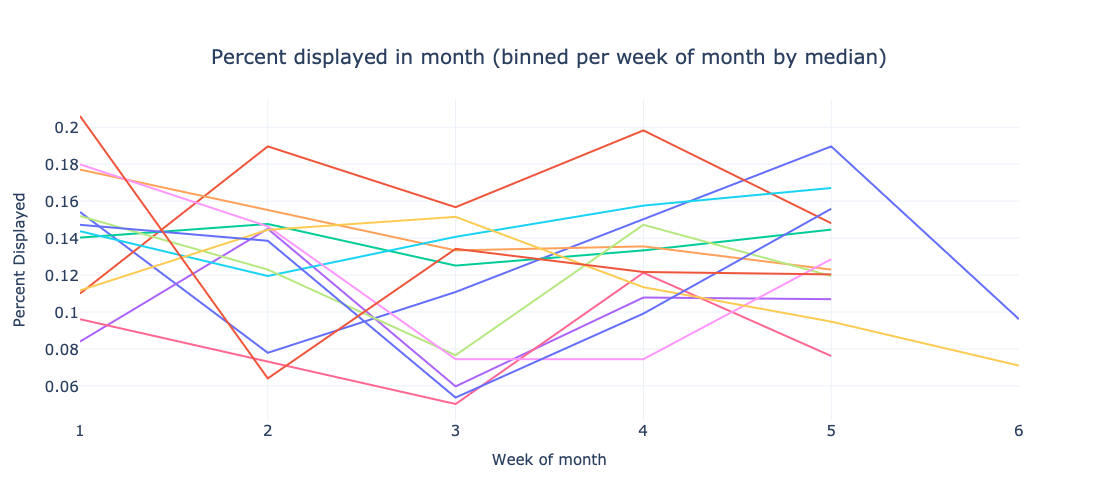

In [24]:
# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)

#weekly seasonality: percent featured

fig = px.line(plot_df_2[['percent_display', "month_name", "week_of_month"]], y='percent_display', x="week_of_month", color="month_name", title="Percent displayed in month (binned per week of month by median)")
fig = format_plot(fig, ylabel='Percent Displayed', xlabel="Week of month", legends=None)
fig.update_layout(showlegend=False) 
# plotting_utils.make_lines_greyscale(fig)
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_seasonal_plot_per_week_of_month_percent_display.png")
fig.show()
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: a little difficult to make out any seasons in week of month from the graph

# Conclusions:

Correlations:
   
   - median sales price and median base price have some relationship where an increase in base price is followed with a slight delay by a drop in sales price once the base price drops again

    (company absorbs base price increases, when base prices drop again company lowers sales prices)
   
   - lower median base/sales price correlates with high units sold

    (lower base/sales price correlates with more sales)

   - lower median sales prices coincide with high percentage of items featured/displayed and vice versa

    (more featured items coincides with lower prices, likely part of featuring sales strategy to have lower prices for those featured items of course; more displayed items coincides with lower prices, likely part of display sales strategy to have lower prices for those displayed items of course so they further catch the eye and sell)

   - high base prices follow after a delay high percentage of items featured up to Oct 2012; after Oct 2012 low % featured corresponds to high base prices

    (possibly after featured items are selling well the base price is raised to make more profit up to Oct 2012? Then possibly change in strategy to default position of featured items having low base prices to keep sales prices low to attract more sales, therefore meaning low % of featured items coincides with higher base prices) and vice versa

   - low base prices coincide with higher % displayed and vice versa

    (displayed items have lower base prices to keep sales prices low and attract more sales when they are prominently seen)

   - high units sold coincide with higher % featured and vice versa (featuring items helps them sell)
   - high units sold coincide with higher % displayed and vice versa (displaying items helps them sell)
     
   - high % featured coincides with higher % displayed and vice versa

    (increases in featuring of items occur as a strategy in tandem with increases in prominent displaying of items as a whole strategy to increase sales and profit)




Seasonality:

   - calculated EDA variable seasonalities for seasonal imputation (median sales price, median base price, median units sold, percent featured, percent displayed, in weeks respectively): 64, 'not seasonal', 35, 13, 45)
   - for median sales price, binned per month using median value in month could be seasons every 3 months, 6 months, hard to tell
   - for median base price, binned per month using median value in month seems to be no annual pattern
   - for median units sold/percent featured/percent displayed, binned per month using median value in month, difficult to see consistent season here from this graph within a given year for the 3 years
   - for median sales prices/base prices/units sold/percent displayed, binned per week of month using median value in month, difficult to make out any seasons in week of month from these graphs
   - for percent featured, binned per week of month using median value in month, a little difficult to make out any seasons in week of month from the graph - possibly seasonal behaviour repeats in 3rd week each month but not clear enough from this graph
